# PROJEKT OTODOM 
# Przewidywanie cen mieszkan w Katowicach w oparciu o dane z Otodom.
# Czesc II Przewidywania cen mieszkan.

# Iwona Rojewski, Bootcamp Data Science, grupa II Katowice

"""
  Projekt ma na celu zastosowanie modeli regresji do przewidywania ceny mieszkania o podanych cechach.
  
  Dane zostaly pobrane ze strony www.otodom.pl w dniu 2 maja 2019 roku.
  
  Cechy na ktorych opiera sie wycena mieszkania to: Powierzchnia, Liczba pokoi, Rynek, Rodzaj zabudowy,
  Piętro, Liczba pięter, Materiał budynku, Ogrzewanie, Rok budowy, Stan wykończenia, Forma własności, Okna,
  Czynsz, Dostępne od.
  
  Zmienna celu to cena mieszkania.
"""

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

import scipy.stats as st
from scipy.stats import norm
from scipy import stats

from sklearn.decomposition import PCA

from sklearn import datasets
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
kfold = model_selection.KFold(n_splits=5, random_state=42)

from sklearn import  metrics


In [3]:
#Kod przy uzywanu Colab.
#from google.colab import drive
#drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
"""Pobieranie danych z pliku mieszkania20190502 zawierajacego informacje o mieszkaniach w Katowicach
   oferowanych na stronie www.otodom.pl w dniu 02.05.2019r."""

#Wczytywanie danych na Colab
#data = pd.read_csv('gdrive/My Drive/projekt/mieszkania20190502.csv', decimal= ',')

In [5]:
data = pd.read_csv(r'mieszkania20190502.csv',decimal=",")
data.head()

,Unnamed: 0,Powierzchnia,Liczba pokoi,Rynek,Rodzaj zabudowy,Piętro,Liczba pięter,Materiał budynku,Ogrzewanie,Rok budowy,Stan wykończenia,Forma własności,Okna,Czynsz,Dostępne od,Cena
0,0,52.20,3,wtórny,apartamentowiec,3.0,4.0,pustak,miejskie,2019.0,do zamieszkania,NaN,NaN,NaN,NaN,349740.0
1,1,59.07,3,wtórny,blok,1.0,10.0,pustak,miejskie,NaN,do wykończenia,NaN,NaN,NaN,NaN,326598.0
2,2,54.03,3,pierwotny,blok,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329583.0
3,3,43,2,wtórny,blok,1.0,10.0,inne,miejskie,1976.0,do zamieszkania,spółdzielcze wł. z KW,NaN,NaN,NaN,305000.0
4,4,53,3,wtórny,blok,4.0,4.0,wielka płyta,miejskie,NaN,NaN,spółdzielcze własnościowe,plastikowe,506,NaN,259000.0


In [6]:
"""Usuwam kolumne Unnamed: 0 nie wnoszaca zadnych informacji."""

data = data.drop('Unnamed: 0', axis=1)
data

,Powierzchnia,Liczba pokoi,Rynek,Rodzaj zabudowy,Piętro,Liczba pięter,Materiał budynku,Ogrzewanie,Rok budowy,Stan wykończenia,Forma własności,Okna,Czynsz,Dostępne od,Cena
0,52.20,3,wtórny,apartamentowiec,3.0,4.0,pustak,miejskie,2019.0,do zamieszkania,NaN,NaN,NaN,NaN,349740.0
1,59.07,3,wtórny,blok,1.0,10.0,pustak,miejskie,NaN,do wykończenia,NaN,NaN,NaN,NaN,326598.0
2,54.03,3,pierwotny,blok,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329583.0
3,43,2,wtórny,blok,1.0,10.0,inne,miejskie,1976.0,do zamieszkania,spółdzielcze wł. z KW,NaN,NaN,NaN,305000.0
4,53,3,wtórny,blok,4.0,4.0,wielka płyta,miejskie,NaN,NaN,spółdzielcze własnościowe,plastikowe,506,NaN,259000.0
5,42.28,2,pierwotny,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271000.0
6,78,2,wtórny,apartamentowiec,2.0,4.0,pustak,miejskie,2010.0,do zamieszkania,pełna własność,NaN,770,NaN,750000.0
7,25.60,1,wtórny,apartamentowiec,1.0,5.0,żelbet,miejskie,2020.0,do zamieszkania,pełna własność,NaN,150,NaN,188000.0
8,47.48,2,pierwotny,blok,2.0,3.0,NaN,NaN,NaN,do wykończenia,pełna własność,NaN,NaN,NaN,293377.0
9,37,2,wtórny,blok,1.0,4.0,NaN,gazowe,NaN,do zamieszkania,spółdzielcze własnościowe,NaN,NaN,NaN,155000.0


In [7]:
""" Analiza i czyszczenie danych.""" 

' Analiza i czyszczenie danych.'

In [8]:
"""Sprawdzam ile mam danych mieszkan, jakie sa ich ceny i cechy, ile mam ndanych bez brakow, jakiego typu sa dane."""

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 15 columns):
Powierzchnia        2562 non-null object
Liczba pokoi        2562 non-null int64
Rynek               2562 non-null object
Rodzaj zabudowy     2233 non-null object
Piętro              2487 non-null float64
Liczba pięter       2369 non-null float64
Materiał budynku    927 non-null object
Ogrzewanie          2018 non-null object
Rok budowy          1136 non-null float64
Stan wykończenia    1734 non-null object
Forma własności     1657 non-null object
Okna                1704 non-null object
Czynsz              663 non-null object
Dostępne od         285 non-null object
Cena                2562 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 300.3+ KB


In [9]:
"""Sprawdzam ile jest brakow w poszczegolnych kolumnach i gdzie jest ich najwiecej."""

missing_values = data.isnull().sum()
sort_missing_values=missing_values[missing_values>0].sort_values(ascending = False)  
sort_missing_values

Dostępne od         2277
Czynsz              1899
Materiał budynku    1635
Rok budowy          1426
Forma własności      905
Okna                 858
Stan wykończenia     828
Ogrzewanie           544
Rodzaj zabudowy      329
Liczba pięter        193
Piętro                75
dtype: int64

Text(0.5, 1.0, 'Braki danych dla poszczegolnych cech')

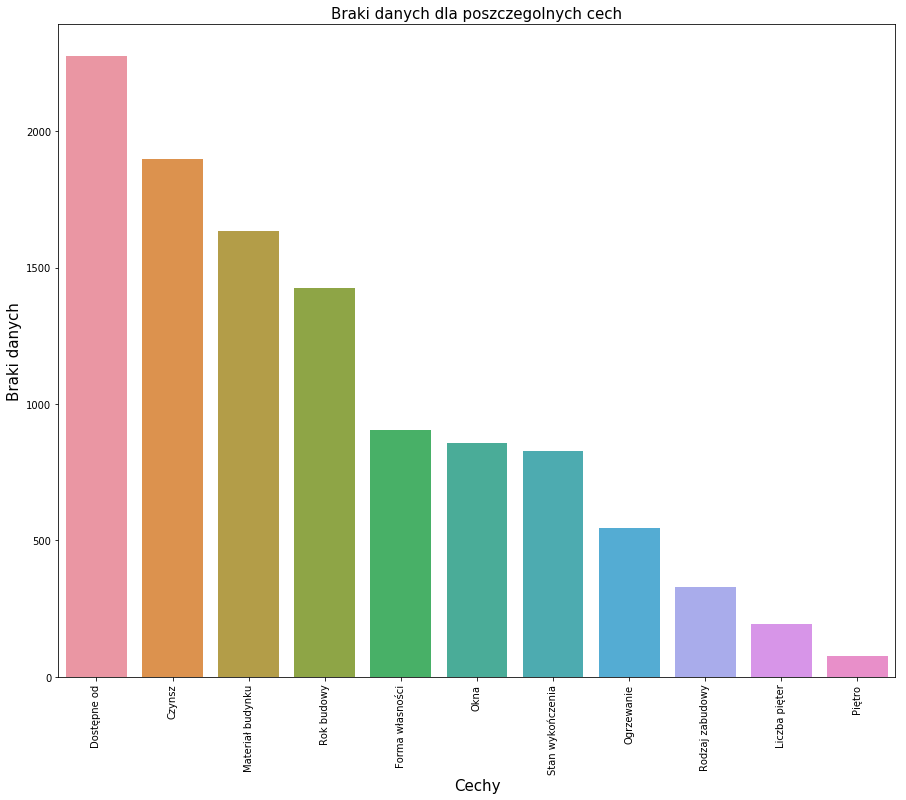

In [10]:
"""Wizualizuje informacje o liczbie brakow dla poszczegolnych cech."""
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=sort_missing_values.index, y=sort_missing_values)
plt.xlabel('Cechy', fontsize=15)
plt.ylabel('Braki danych', fontsize=15)
plt.title('Braki danych dla poszczegolnych cech', fontsize=15) 

In [11]:
"""Usuwam kolumne 'Dostępne od' z uwagi na ok. 90% braki danych."""

data['Dostępne od'].value_counts()
data=data.drop(['Dostępne od'],axis=1)
data

,Powierzchnia,Liczba pokoi,Rynek,Rodzaj zabudowy,Piętro,Liczba pięter,Materiał budynku,Ogrzewanie,Rok budowy,Stan wykończenia,Forma własności,Okna,Czynsz,Cena
0,52.20,3,wtórny,apartamentowiec,3.0,4.0,pustak,miejskie,2019.0,do zamieszkania,NaN,NaN,NaN,349740.0
1,59.07,3,wtórny,blok,1.0,10.0,pustak,miejskie,NaN,do wykończenia,NaN,NaN,NaN,326598.0
2,54.03,3,pierwotny,blok,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329583.0
3,43,2,wtórny,blok,1.0,10.0,inne,miejskie,1976.0,do zamieszkania,spółdzielcze wł. z KW,NaN,NaN,305000.0
4,53,3,wtórny,blok,4.0,4.0,wielka płyta,miejskie,NaN,NaN,spółdzielcze własnościowe,plastikowe,506,259000.0
5,42.28,2,pierwotny,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271000.0
6,78,2,wtórny,apartamentowiec,2.0,4.0,pustak,miejskie,2010.0,do zamieszkania,pełna własność,NaN,770,750000.0
7,25.60,1,wtórny,apartamentowiec,1.0,5.0,żelbet,miejskie,2020.0,do zamieszkania,pełna własność,NaN,150,188000.0
8,47.48,2,pierwotny,blok,2.0,3.0,NaN,NaN,NaN,do wykończenia,pełna własność,NaN,NaN,293377.0
9,37,2,wtórny,blok,1.0,4.0,NaN,gazowe,NaN,do zamieszkania,spółdzielcze własnościowe,NaN,NaN,155000.0


In [12]:
""" Informacja o cechach."""
data.columns

Index(['Powierzchnia', 'Liczba pokoi', 'Rynek', 'Rodzaj zabudowy', 'Piętro',
       'Liczba pięter', 'Materiał budynku', 'Ogrzewanie', 'Rok budowy',
       'Stan wykończenia', 'Forma własności', 'Okna', 'Czynsz', 'Cena'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 14 columns):
Powierzchnia        2562 non-null object
Liczba pokoi        2562 non-null int64
Rynek               2562 non-null object
Rodzaj zabudowy     2233 non-null object
Piętro              2487 non-null float64
Liczba pięter       2369 non-null float64
Materiał budynku    927 non-null object
Ogrzewanie          2018 non-null object
Rok budowy          1136 non-null float64
Stan wykończenia    1734 non-null object
Forma własności     1657 non-null object
Okna                1704 non-null object
Czynsz              663 non-null object
Cena                2562 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 280.3+ KB


In [14]:
"""W kolumnie 'Powierzchnia', 'Liczba pokoi', 'Rynek' jest komplet danych. """

"W kolumnie 'Powierzchnia', 'Liczba pokoi', 'Rynek' jest komplet danych. "

In [0]:
"""Zamieniam dane w kolumnie Cena i Powierzchnia na float."""
data['Cena'] = data['Cena'].astype('float64')
data['Powierzchnia'] = data['Powierzchnia'].astype('float64')


In [0]:
"""Zamieniam braki na string Brak dla wybranych kolumn (typ object)."""

columns = ['Rodzaj zabudowy','Liczba pięter', 'Materiał budynku','Ogrzewanie','Stan wykończenia','Forma własności','Okna','Czynsz']

for kolumna in columns:
    data[kolumna].fillna('Brak',inplace = True)
    


In [17]:
"""Analiza danych w kolumnie 'Rodzaj zabudowy'. Mamy 329 brakow (13%). """
data['Rodzaj zabudowy'].value_counts()

apartamentowiec     1237
blok                 747
Brak                 329
kamienica            212
dom wolnostojący      21
szeregowiec           16
Name: Rodzaj zabudowy, dtype: int64

In [18]:
"""Dane dla brakow w Rodzaju zabudowy."""
Braki_rodzaj_zabudowy = data[data['Rodzaj zabudowy'] == 'Brak']
Braki_rodzaj_zabudowy

,Powierzchnia,Liczba pokoi,Rynek,Rodzaj zabudowy,Piętro,Liczba pięter,Materiał budynku,Ogrzewanie,Rok budowy,Stan wykończenia,Forma własności,Okna,Czynsz,Cena
5,42.28,2,pierwotny,Brak,0.0,Brak,Brak,Brak,NaN,Brak,Brak,Brak,Brak,271000.0
10,135.00,7,wtórny,Brak,1.0,4,inne,miejskie,NaN,do remontu,pełna własność,drewniane,Brak,540000.0
12,42.28,2,pierwotny,Brak,0.0,Brak,Brak,Brak,NaN,Brak,Brak,Brak,Brak,271000.0
46,72.12,4,wtórny,Brak,9.0,10,Brak,Brak,NaN,Brak,pełna własność,Brak,Brak,315000.0
59,55.65,2,pierwotny,Brak,3.0,Brak,Brak,Brak,NaN,Brak,Brak,Brak,Brak,367000.0
76,70.00,2,wtórny,Brak,NaN,Brak,Brak,Brak,NaN,Brak,Brak,Brak,Brak,155000.0
126,55.65,2,pierwotny,Brak,3.0,Brak,Brak,miejskie,NaN,Brak,Brak,Brak,Brak,367000.0
130,55.38,3,wtórny,Brak,7.0,10,Brak,Brak,NaN,Brak,Brak,Brak,Brak,250000.0
132,45.00,2,wtórny,Brak,2.0,3,cegła,miejskie,NaN,do zamieszkania,pełna własność,plastikowe,Brak,250000.0
138,45.00,2,wtórny,Brak,2.0,3,cegła,miejskie,NaN,do zamieszkania,pełna własność,plastikowe,520,250000.0


In [19]:
"""Analiza brakow w Rodzaju zabudowy z uwzglednieniem rodzaju Rynku."""

'Analiza brakow w Rodzaju zabudowy z uwzglednieniem rodzaju Rynku.'

In [20]:
""" Analiza rynku pierwotnego"""

Rynek_pierwotny = data[data['Rynek'] == 'pierwotny']
Rynek_pierwotny['Rodzaj zabudowy'].value_counts()

apartamentowiec     1001
blok                 311
Brak                 121
dom wolnostojący      15
szeregowiec           11
kamienica              7
Name: Rodzaj zabudowy, dtype: int64

In [21]:
"""Dla rynku pierwotnego zdecydowanie najczesciej wskazanym rodzajem zabudowy jest apartamentowiec, wiec uzupelniam takie braki apartamentowcem."""
for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'Brak' and data['Rynek'][row] == 'pierwotny':
        data['Rodzaj zabudowy'][row] = data['Rodzaj zabudowy'][row].replace('Brak', 'apartamentowiec')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
data['Rodzaj zabudowy'].value_counts()

apartamentowiec     1358
blok                 747
kamienica            212
Brak                 208
dom wolnostojący      21
szeregowiec           16
Name: Rodzaj zabudowy, dtype: int64

In [23]:
"""Analiza brakow rodzaju zabudowy dla Rynku wtornego."""

Rynek_wtorny = data[data['Rynek'] == 'wtórny']
Rynek_wtorny['Rodzaj zabudowy'].value_counts()

blok                436
apartamentowiec     236
Brak                208
kamienica           205
dom wolnostojący      6
szeregowiec           5
Name: Rodzaj zabudowy, dtype: int64

In [24]:
"""Tworzenie DataFrame dla brakow w Rodzaju zabudowy dla rynku wtornego"""
Braki_rodzaj_zabudowy = data[data['Rodzaj zabudowy'] == 'Brak']
Braki_rodzaj_zabudowy

,Powierzchnia,Liczba pokoi,Rynek,Rodzaj zabudowy,Piętro,Liczba pięter,Materiał budynku,Ogrzewanie,Rok budowy,Stan wykończenia,Forma własności,Okna,Czynsz,Cena
10,135.00,7,wtórny,Brak,1.0,4,inne,miejskie,NaN,do remontu,pełna własność,drewniane,Brak,540000.0
46,72.12,4,wtórny,Brak,9.0,10,Brak,Brak,NaN,Brak,pełna własność,Brak,Brak,315000.0
76,70.00,2,wtórny,Brak,NaN,Brak,Brak,Brak,NaN,Brak,Brak,Brak,Brak,155000.0
130,55.38,3,wtórny,Brak,7.0,10,Brak,Brak,NaN,Brak,Brak,Brak,Brak,250000.0
132,45.00,2,wtórny,Brak,2.0,3,cegła,miejskie,NaN,do zamieszkania,pełna własność,plastikowe,Brak,250000.0
138,45.00,2,wtórny,Brak,2.0,3,cegła,miejskie,NaN,do zamieszkania,pełna własność,plastikowe,520,250000.0
160,37.50,2,wtórny,Brak,6.0,13,wielka płyta,miejskie,1966.0,do zamieszkania,Brak,plastikowe,275,229000.0
161,75.60,3,wtórny,Brak,2.0,4,Brak,Brak,NaN,Brak,Brak,Brak,Brak,420000.0
176,127.00,5,wtórny,Brak,0.0,3,Brak,gazowe,NaN,do remontu,pełna własność,Brak,Brak,330000.0
181,47.60,2,wtórny,Brak,5.0,7,Brak,Brak,NaN,Brak,Brak,Brak,Brak,465000.0


In [25]:
"""Analiza brakow dla rynku wtornego. Przyjmuje, ze przed 1946 podstawowym rodzajem zabudowy byl dom wolnostojacy i kamiennica."""

Braki_rodzaj_zabudowy[Braki_rodzaj_zabudowy['Rok budowy']<=1946]

,Powierzchnia,Liczba pokoi,Rynek,Rodzaj zabudowy,Piętro,Liczba pięter,Materiał budynku,Ogrzewanie,Rok budowy,Stan wykończenia,Forma własności,Okna,Czynsz,Cena
1225,834.08,11,wtórny,Brak,4.0,5,Brak,miejskie,1942.0,do wykończenia,pełna własność,Brak,Brak,5430000.0
1275,70.00,2,wtórny,Brak,3.0,4,Brak,Brak,1912.0,Brak,pełna własność,Brak,Brak,415000.0
1647,49.02,3,wtórny,Brak,1.0,2,Brak,Brak,1900.0,Brak,pełna własność,Brak,Brak,179900.0
2197,125.00,3,wtórny,Brak,5.0,5,Brak,Brak,1939.0,Brak,pełna własność,Brak,Brak,537500.0
2333,172.00,5,wtórny,Brak,2.0,3,Brak,Brak,1937.0,Brak,Brak,Brak,Brak,1200000.0
2401,110.63,4,wtórny,Brak,0.0,1,Brak,Brak,1938.0,do remontu,pełna własność,Brak,Brak,275000.0


In [26]:
"""W zaleznosci od liczby pieter, rodzaj zabudowy zamieniam na dom wolnostojacy (liczba pieter = 1) lub kamienice (liczba pieter>1)."""

for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'Brak' and data['Rok budowy'][row] == 1938:
        data['Rodzaj zabudowy'][row] = 'dom wolnostojący' 
        
for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'Brak' and data['Rok budowy'][row] < 1943:
        data['Rodzaj zabudowy'][row] = 'kamienica' 

#Pojawil sie warning. Sprawdzilam i efekt dzialania kodu jest prawidlowy. Podobnie postepowalam przy kolejnych warningach.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
"""Dla pozostalych brakow przy rynku wtornym, jako rodzajzabudowy wprowadzamy blok (najczesciej pojawiajaca sie pozycja dla rynku wtornego."""

data['Rodzaj zabudowy'] = data['Rodzaj zabudowy'].replace('Brak', 'blok')
data['Rodzaj zabudowy'].value_counts()

apartamentowiec     1358
blok                 949
kamienica            217
dom wolnostojący      22
szeregowiec           16
Name: Rodzaj zabudowy, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 14 columns):
Powierzchnia        2562 non-null float64
Liczba pokoi        2562 non-null int64
Rynek               2562 non-null object
Rodzaj zabudowy     2562 non-null object
Piętro              2487 non-null float64
Liczba pięter       2562 non-null object
Materiał budynku    2562 non-null object
Ogrzewanie          2562 non-null object
Rok budowy          1136 non-null float64
Stan wykończenia    2562 non-null object
Forma własności     2562 non-null object
Okna                2562 non-null object
Czynsz              2562 non-null object
Cena                2562 non-null float64
dtypes: float64(4), int64(1), object(9)
memory usage: 280.3+ KB


In [29]:
""" W kolumnie 'Piętro' (miejsce usytuowania mieszkania) mamy 75 brakow (3%). """
data['Piętro'].value_counts()

 1.0      512
 0.0      501
 2.0      398
 3.0      356
 4.0      217
 5.0      128
 10.0     121
 6.0       78
 7.0       72
 8.0       67
 9.0       32
 100.0      4
-1.0        1
Name: Piętro, dtype: int64

In [0]:
"""Braki uzupelniam najczesciej powtarzajaca sie pozycja."""

data['Piętro'].fillna(data['Piętro'].mode()[0],inplace = True)

In [31]:
data['Piętro'].value_counts()

 1.0      587
 0.0      501
 2.0      398
 3.0      356
 4.0      217
 5.0      128
 10.0     121
 6.0       78
 7.0       72
 8.0       67
 9.0       32
 100.0      4
-1.0        1
Name: Piętro, dtype: int64

In [0]:
"""Usuwam Suterene oznaczona jako -1 i Poddasze oznaczone jako 100 w Czesc I podczas tworzenia DataFrame.
   Powod usuwania - sa to specyficzne rodzaje mieszkania, jest malo danych: 4 mieszkania na poddaszu i 1 w suterenie."""

data.drop(data[(data['Piętro'] == 100)].index,inplace = True)
data.drop(data[(data['Piętro'] == -1)].index,inplace = True)
#Uwazam, ze nalezy te pozycje usunac, jezeli jednak restrykcyjnie nie wolno usuwac, to zastosowalabym ponizszy kod:
#Sprawdzam jaka jest liczba pieter tam gdzie poddasze, czyli oznaczenie pietro=100 i Pietro bedzie rowne Liczbie pieter.
#data[data['Piętro']==100]
# Taka sytuacja jest w wierszu 300 (pieter 25), 2221 (4), 2447 (5), 2473 (2)
#data.loc[data['Piętro'] == 100, 'Piętro'] = data['Liczba pięter']

In [33]:
"""W kolumnie 'Liczba pięter' mamy 193 braki (7.5%). """
data['Liczba pięter'].value_counts()

4.0     520
5.0     481
10.0    389
3.0     206
Brak    193
2.0     185
6.0     182
8.0     115
7.0      68
1.0      45
16.0     30
13.0     23
14.0     23
18.0     21
11.0     20
9.0      17
15.0     15
12.0     11
17.0      8
24.0      3
25.0      1
19.0      1
Name: Liczba pięter, dtype: int64

In [34]:
"""Tworze DataFrame dla brakow w liczbie pieter."""

Braki_liczba_pieter = data[data['Liczba pięter'] == 'Brak']
Braki_liczba_pieter

,Powierzchnia,Liczba pokoi,Rynek,Rodzaj zabudowy,Piętro,Liczba pięter,Materiał budynku,Ogrzewanie,Rok budowy,Stan wykończenia,Forma własności,Okna,Czynsz,Cena
5,42.28,2,pierwotny,apartamentowiec,0.0,Brak,Brak,Brak,NaN,Brak,Brak,Brak,Brak,271000.0
12,42.28,2,pierwotny,apartamentowiec,0.0,Brak,Brak,Brak,NaN,Brak,Brak,Brak,Brak,271000.0
19,114.15,4,pierwotny,apartamentowiec,3.0,Brak,Brak,miejskie,NaN,Brak,Brak,Brak,Brak,810465.0
34,45.00,2,wtórny,blok,3.0,Brak,Brak,miejskie,NaN,Brak,spółdzielcze własnościowe,Brak,Brak,220000.0
44,131.68,5,pierwotny,apartamentowiec,1.0,Brak,Brak,miejskie,NaN,do wykończenia,pełna własność,Brak,Brak,935000.0
53,51.99,3,pierwotny,blok,1.0,Brak,Brak,miejskie,2019.0,Brak,Brak,Brak,Brak,320233.0
54,44.79,3,pierwotny,blok,1.0,Brak,Brak,Brak,2019.0,Brak,pełna własność,Brak,Brak,268299.0
55,41.65,2,pierwotny,blok,1.0,Brak,Brak,Brak,2019.0,Brak,pełna własność,Brak,Brak,307044.0
59,55.65,2,pierwotny,apartamentowiec,3.0,Brak,Brak,Brak,NaN,Brak,Brak,Brak,Brak,367000.0
60,72.12,4,wtórny,blok,9.0,Brak,wielka płyta,miejskie,1980.0,do zamieszkania,spółdzielcze własnościowe,plastikowe,Brak,315000.0


In [35]:
Braki_liczba_pieter['Rodzaj zabudowy'].value_counts()

apartamentowiec     97
blok                74
kamienica           17
szeregowiec          4
dom wolnostojący     1
Name: Rodzaj zabudowy, dtype: int64

In [0]:
"""Tworze DataFrame dla Liczby pieter bez brakow."""
Znana_liczba_pieter = data[data['Liczba pięter'] != 'Brak']

In [37]:
"""Wyznaczam mediane dla liczby pieter w apartamentowcu."""

Znana_liczba_pieter[Znana_liczba_pieter['Rodzaj zabudowy'] == 'apartamentowiec']['Liczba pięter'].median()

5.0

In [38]:
"""Braki liczby pieter uzupelniam mediana dla poszczegolnych rodzajow zabudowy (apartamentowiec) lub wartoscia z pietra, gdy pietro na ktorym jest mieszkanie jest powyzej mediany."""

for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'apartamentowiec' and data['Liczba pięter'][row] == 'Brak' and data['Piętro'][row] <= 5:
        data['Liczba pięter'][row] = 5 
        
for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'apartamentowiec' and data['Liczba pięter'][row] == 'Brak':
        data['Liczba pięter'][row] = data['Piętro'][row]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
"""Wyznaczam mediane dla Liczby pieter w bloku."""
Znana_liczba_pieter[Znana_liczba_pieter['Rodzaj zabudowy'] == 'blok']['Liczba pięter'].median()

5.0

In [40]:
"""Braki liczby pieter uzupelniam mediana dla poszczegolnych rodzajow zabudowy (blok) lub wartoscia z pietra, gdy pietro na ktorym jest mieszkanie jest powyzej mediany."""


for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'blok' and data['Liczba pięter'][row] == 'Brak' and data['Piętro'][row] <= 5:
        data['Liczba pięter'][row] = 5 
        
for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'blok' and data['Liczba pięter'][row] == 'Brak':
        data['Liczba pięter'][row] = data['Piętro'][row]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [41]:
"""Wyznaczam mediane dla liczby pieter dla kamiennicy."""

Znana_liczba_pieter[Znana_liczba_pieter['Rodzaj zabudowy'] == 'kamienica']['Liczba pięter'].median()

4.0

In [42]:
"""Braki liczby pieter uzupelniam mediana dla poszczegolnych rodzajow zabudowy (kamienica) lub wartoscia z pietra, gdy pietro na ktorym jest mieszkanie jest powyzej mediany."""

for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'kamienica' and data['Liczba pięter'][row] == 'Brak' and data['Piętro'][row] <= 4:
        data['Liczba pięter'][row] = 4 
        
for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'kamienica' and data['Liczba pięter'][row] == 'Brak':
        data['Liczba pięter'][row] = data['Piętro'][row]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [43]:
"""Wyznaczam mediane liczby pieter dla szeregowcow."""
Znana_liczba_pieter[Znana_liczba_pieter['Rodzaj zabudowy'] == 'szeregowiec']['Liczba pięter'].median()

1.0

In [44]:
"""Braki liczby pieter uzupelniam mediana dla poszczegolnych rodzajow zabudowy (szeregowiec) lub wartoscia z pietra, gdy pietro na ktorym jest mieszkanie jest powyzej mediany."""

for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'szeregowiec' and data['Liczba pięter'][row] == 'Brak' and data['Piętro'][row] <= 1:
        data['Liczba pięter'][row] = 1 
        
for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'szeregowiec' and data['Liczba pięter'][row] == 'Brak':
        data['Liczba pięter'][row] = data['Piętro'][row]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
"""Wyzanczam mediane liczby pieter dla domu."""
Znana_liczba_pieter[Znana_liczba_pieter['Rodzaj zabudowy'] == 'dom wolnostojący']['Liczba pięter'].median()

4.0

In [46]:
"""Braki liczby pieter uzupelniam mediana dla poszczegolnych rodzajow zabudowy (dom wolnostojacy) lub wartoscia z pietra, gdy pietro na ktorym jest mieszkanie jest powyzej mediany."""


for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'dom wolnostojący' and data['Liczba pięter'][row] == 'Brak' and data['Piętro'][row] <= 4:
        data['Liczba pięter'][row] = 4 
        
for row in data.index:
    if data['Rodzaj zabudowy'][row] == 'dom wolnostojący' and data['Liczba pięter'][row] == 'Brak':
        data['Liczba pięter'][row] = data['Piętro'][row]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
"""Klasyfikuje budynki na podstawie liczby pieter zgodnie z rozporzadzeniem ministra infrastruktury:
   Budynki niskie - do 4 pietra
   Budynki średniowysokie - od 5 do 9 pietra
   Budynki wysokie -  od 10 do 18 pietra
   Wysokościowce - od 19 pietra.
"""

for i in range(0,5):
    data['Liczba pięter'] = data['Liczba pięter'].replace(i, 'Budynki_niskie')
    
for i in range(5,10):
    data['Liczba pięter'] = data['Liczba pięter'].replace(i, 'Budynki_sredniowysokie')

for i in range(10,19):
    data['Liczba pięter'] = data['Liczba pięter'].replace(i, 'Budynki_wysokie')
    
for i in range(len(data['Liczba pięter'])):
    data['Liczba pięter'] = data['Liczba pięter'].replace(i, 'Wysokosciowce')
    
data['Liczba pięter'].value_counts()  

Budynki_sredniowysokie    1019
Budynki_niskie             978
Budynki_wysokie            555
Wysokosciowce                5
Name: Liczba pięter, dtype: int64

In [48]:
"""Nie ma dominujacego Materialu i 1632 braki (ponad 60%)."""

data['Materiał budynku'].value_counts()

Brak               1632
pustak              346
cegła               244
inne                134
wielka płyta        113
beton                58
żelbet               14
silikat              13
drewno                2
beton komórkowy       1
Name: Materiał budynku, dtype: int64

In [49]:
"""Braki dla materialow lacze z pozycja 'inne'."""

data['Materiał budynku'].fillna('None',inplace = True)
data['Materiał budynku'] = data['Materiał budynku'].replace('None', 'inne')

"""Beton komorkowy to rodzaj betonu, wiec lacze te dwie pozycje."""
data['Materiał budynku'] = data['Materiał budynku'].replace('beton komórkowy', 'beton')

"""Wielka płyta to rodzaj elewacji z surowego betonu, wiec lacze dane z betonem. """
data['Materiał budynku'] = data['Materiał budynku'].replace('wielka płyta', 'beton')

"""Zelbet to kompozyt strukturalny składający się z betonu wzmocnionego zbrojeniem, wiec laczez betonem."""
data['Materiał budynku'] = data['Materiał budynku'].replace('żelbet', 'beton')

"""Silikat to rodzaj cegly, lacze wiec z cegla."""
data['Materiał budynku'] = data['Materiał budynku'].replace('silikat', 'cegła')
data['Materiał budynku'].value_counts()

Brak      1632
pustak     346
cegła      257
beton      186
inne       134
drewno       2
Name: Materiał budynku, dtype: int64

In [0]:
"""Brak informacji w Materiał budynku dotyczy ponad 60%. W pozostalych pozycjach nie ma dominujacej kategorii.
   Usuwam wiec kolumne Materiał budynku.
"""

data=data.drop('Materiał budynku', axis=1)

In [51]:
"""W kolumnie 'Ogrzewanie' mamy 544 braki (21%). Dominuje ogrzewanie miejskie (70%)."""
data['Ogrzewanie'].value_counts()

miejskie         1798
Brak              543
gazowe            118
inne               57
elektryczne        29
kotłownia           9
piece kaflowe       3
Name: Ogrzewanie, dtype: int64

In [52]:
"""Analiza brakow dla Ogrzewania."""

Brak_ogrzewania = data[data['Ogrzewanie'] == 'Brak']
Brak_ogrzewania

,Powierzchnia,Liczba pokoi,Rynek,Rodzaj zabudowy,Piętro,Liczba pięter,Ogrzewanie,Rok budowy,Stan wykończenia,Forma własności,Okna,Czynsz,Cena
2,54.03,3,pierwotny,blok,2.0,Budynki_sredniowysokie,Brak,NaN,Brak,Brak,Brak,Brak,329583.0
5,42.28,2,pierwotny,apartamentowiec,0.0,Budynki_sredniowysokie,Brak,NaN,Brak,Brak,Brak,Brak,271000.0
8,47.48,2,pierwotny,blok,2.0,Budynki_niskie,Brak,NaN,do wykończenia,pełna własność,Brak,Brak,293377.0
12,42.28,2,pierwotny,apartamentowiec,0.0,Budynki_sredniowysokie,Brak,NaN,Brak,Brak,Brak,Brak,271000.0
22,47.48,2,pierwotny,blok,1.0,Budynki_niskie,Brak,2020.0,do wykończenia,pełna własność,Brak,Brak,290823.0
24,88.13,3,pierwotny,apartamentowiec,2.0,Budynki_niskie,Brak,2020.0,do wykończenia,pełna własność,Brak,Brak,608097.0
30,34.75,1,wtórny,blok,2.0,Budynki_niskie,Brak,NaN,do zamieszkania,pełna własność,plastikowe,200,159000.0
32,41.00,2,wtórny,kamienica,0.0,Budynki_niskie,Brak,NaN,do zamieszkania,pełna własność,plastikowe,150,263000.0
36,48.00,3,wtórny,kamienica,0.0,Budynki_niskie,Brak,NaN,Brak,Brak,Brak,320,199000.0
46,72.12,4,wtórny,blok,9.0,Budynki_wysokie,Brak,NaN,Brak,pełna własność,Brak,Brak,315000.0


In [53]:
Brak_ogrzewania['Rodzaj zabudowy'].value_counts()

blok                340
apartamentowiec     141
kamienica            58
szeregowiec           3
dom wolnostojący      1
Name: Rodzaj zabudowy, dtype: int64

In [54]:
"""Sprawdzam jakie jest ogrzewanie dla blokow."""

data[data['Rodzaj zabudowy'] == 'blok']['Ogrzewanie'].value_counts()

miejskie       556
Brak           340
inne            22
gazowe          19
elektryczne      6
kotłownia        4
Name: Ogrzewanie, dtype: int64

In [55]:
"""Sprawdzam jakie jest ogrzewanie dla apartamentowcow."""

data[data['Rodzaj zabudowy'] == 'apartamentowiec']['Ogrzewanie'].value_counts()

miejskie       1147
Brak            141
gazowe           45
inne             18
kotłownia         4
elektryczne       2
Name: Ogrzewanie, dtype: int64

In [56]:
"""Sprawdzam jakie jest ogrzewanie dla kamienic."""

data[data['Rodzaj zabudowy'] == 'kamienica']['Ogrzewanie'].value_counts()

miejskie         79
Brak             58
gazowe           38
elektryczne      21
inne             16
piece kaflowe     2
kotłownia         1
Name: Ogrzewanie, dtype: int64

In [57]:
"""Sprawdzam jakie jest ogrzewanie dla szeregowcow."""

data[data['Rodzaj zabudowy'] == 'szeregowiec']['Ogrzewanie'].value_counts()

gazowe      12
Brak         3
miejskie     1
Name: Ogrzewanie, dtype: int64

In [58]:
"""Sprawdzam jakie jest ogrzewanie dla domow wolnostojacych."""

data[data['Rodzaj zabudowy'] == 'dom wolnostojący']['Ogrzewanie'].value_counts()

miejskie         15
gazowe            4
piece kaflowe     1
inne              1
Brak              1
Name: Ogrzewanie, dtype: int64

In [59]:
"""Z powyzszej analizy wynika, ze zasadne jest uzupelnienie brakow dla rodzaju zabudowy "szeregowiec" - ogrzewaniem 
   gazowym, natomiast dla pozostalych typow zabudowy ogrzewaniem miejskim."""

for row in data.index:
    if data['Ogrzewanie'][row] == 'Brak' and data['Rodzaj zabudowy'][row] == 'szeregowiec':
        data['Ogrzewanie'][row] = 'gazowe' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
"""Braki uzupelniam ogrzewaniem miejskim."""

data['Ogrzewanie'] = data['Ogrzewanie'].replace('Brak', 'miejskie')
data['Ogrzewanie'].value_counts()

miejskie         2338
gazowe            121
inne               57
elektryczne        29
kotłownia           9
piece kaflowe       3
Name: Ogrzewanie, dtype: int64

In [61]:
"""Analiza brakow dla okien."""

data['Okna'].value_counts()

plastikowe    1519
Brak           858
drewniane      133
aluminiowe      47
Name: Okna, dtype: int64

In [62]:
"""Uzupelniam braki dla okien najczesciej powtarzajaca sie wartoscia."""

data['Okna'].fillna('Brak',inplace = True)
imp = SimpleImputer(missing_values='Brak', strategy='most_frequent')
data['Okna']= imp.fit_transform(data[['Okna']]).ravel()
data['Okna'].value_counts()

plastikowe    2377
drewniane      133
aluminiowe      47
Name: Okna, dtype: int64

In [63]:
"""Analiza brakow dla stanu wykonczenia."""

data['Stan wykończenia'].value_counts()

do wykończenia     1101
Brak                827
do zamieszkania     466
do remontu          163
Name: Stan wykończenia, dtype: int64

In [0]:
Braki_wykonczenie = data[data['Stan wykończenia'] == 'Brak']

In [65]:
Braki_wykonczenie['Rynek'].value_counts()

pierwotny    486
wtórny       341
Name: Rynek, dtype: int64

In [66]:
"""Analiza stanu wykonczenia dla rynku pierwotnego."""

data[data['Rynek'] == 'pierwotny']['Stan wykończenia'].value_counts()

do wykończenia     957
Brak               486
do zamieszkania     20
do remontu           3
Name: Stan wykończenia, dtype: int64

In [67]:
"""Z analizy wynika, ze dla rynku pierwotnego w wiekszosci przypadkow mamy stan do wykonczenia."""

for row in data.index:
    if data['Stan wykończenia'][row] == 'Brak' and data['Rynek'][row] == 'pierwotny':
        data['Stan wykończenia'][row] = 'do wykończenia' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [68]:
"Sprawdzam wykonanie dzialania."

data[data['Rynek'] == 'pierwotny']['Stan wykończenia'].value_counts()

do wykończenia     1443
do zamieszkania      20
do remontu            3
Name: Stan wykończenia, dtype: int64

In [69]:
"""Analiza stanu wykonczenia dla rynku wtornego."""

data[data['Rynek'] == 'wtórny']['Stan wykończenia'].value_counts()

do zamieszkania    446
Brak               341
do remontu         160
do wykończenia     144
Name: Stan wykończenia, dtype: int64

In [70]:
data[data['Rynek'] == 'wtórny'][data['Rok budowy'] < 1975]['Stan wykończenia'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


do remontu         70
do zamieszkania    56
Brak               32
do wykończenia     12
Name: Stan wykończenia, dtype: int64

In [71]:
data[data['Rynek'] == 'wtórny'][data['Rok budowy'] > 2010]['Stan wykończenia'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


do wykończenia     68
do zamieszkania    47
Brak               14
Name: Stan wykończenia, dtype: int64

In [72]:
"""
  Z powyzszej analizy wynika, ze dla rynku wtornego przewaza stan do zamieszkania, z wyjatkiem nieruchomosci wybudowanych
  przed rokiem 1975 - tutaj dominuje stan do remontu oraz dla roku budowy powyzej 2010 - tutaj braki uzupelniamy stanem do wykonczenia.
"""

for row in data.index:
    if data['Stan wykończenia'][row] == 'Brak' and data['Rok budowy'][row] < 1975:
        data['Stan wykończenia'][row] = 'do remontu' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
"""Dla roku budowy powyzej 2010 - tutaj braki uzupelniamy stanem do wykonczenia."""

for row in data.index:
    if data['Stan wykończenia'][row] == 'Brak' and data['Rok budowy'][row] > 2010:
        data['Stan wykończenia'][row] = 'do wykończenia' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [74]:
"""Pozostale braki uzupelniam do zamieszkania."""

data['Stan wykończenia'] = data['Stan wykończenia'].replace('Brak', 'do zamieszkania')
data['Stan wykończenia'].value_counts()

do wykończenia     1601
do zamieszkania     761
do remontu          195
Name: Stan wykończenia, dtype: int64

In [75]:
"""Analiza formy wlasnosci."""

data['Forma własności'].value_counts()

pełna własność               1493
Brak                          903
spółdzielcze własnościowe      98
spółdzielcze wł. z KW          63
Name: Forma własności, dtype: int64

In [76]:
"""Lacze spółdzielcze własnościowe z spółdzielcze wł. z KW."""

data['Forma własności'] = data['Forma własności'].replace('spółdzielcze wł. z KW', 'spółdzielcze własnościowe')
data['Forma własności'].value_counts()

pełna własność               1493
Brak                          903
spółdzielcze własnościowe     161
Name: Forma własności, dtype: int64

In [77]:
"""Zdecydowanie przewaza pelna forma wlasnosci. Braki uzupelniam najczesiej pojawiajaca sie wartoscia."""

imp = SimpleImputer(missing_values='Brak', strategy='most_frequent')
data['Forma własności']= imp.fit_transform(data[['Forma własności']]).ravel()
data['Forma własności'].value_counts()

pełna własność               2396
spółdzielcze własnościowe     161
Name: Forma własności, dtype: int64

In [78]:
"""Podsumowanie atrybutow numerycznych."""

data.describe()

,Powierzchnia,Liczba pokoi,Piętro,Rok budowy,Cena
count,2557.000000,2557.000000,2557.000000,1135.000000,2.557000e+03
mean,64.190383,2.777865,2.723895,2000.997357,3.663640e+05
std,75.506544,1.242478,2.682980,32.656960,2.380224e+05
min,18.000000,1.000000,0.000000,1880.000000,6.000000e+04
25%,42.280000,2.000000,1.000000,1990.000000,2.585000e+05
50%,52.110000,3.000000,2.000000,2018.000000,3.100000e+05
75%,71.000000,3.000000,4.000000,2019.000000,4.100000e+05
max,3000.000000,11.000000,10.000000,2021.000000,5.665000e+06


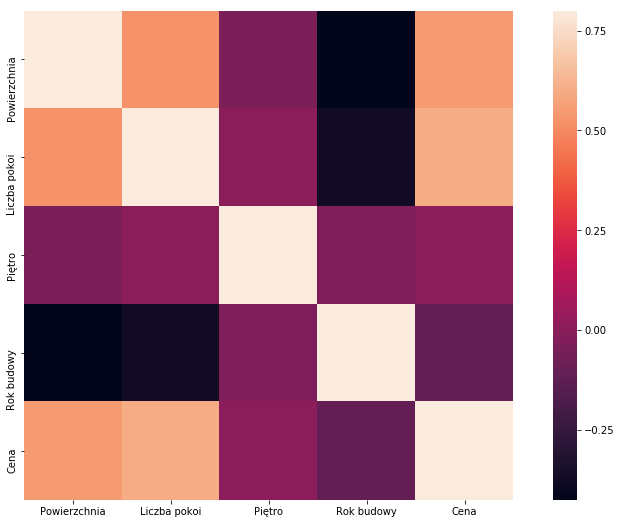

In [79]:
"""Rysuje heatmap w celu badania korelacji. """

corrmat = data.corr()
f,ax = plt.subplots(figsize=(14,9))
sns.heatmap(corrmat, vmax=0.8, square=True)


In [80]:
""" Z heatmap wynika, ze mamy silna korelacje Roku budowy z Powierzchnia i Liczba pokoi.
    Korelacja wynosi odpowiednio 0.4. i 0.36."""

corr_matrix = data.corr()
corr_matrix['Rok budowy']

Powierzchnia   -0.424129
Liczba pokoi   -0.367940
Piętro         -0.029751
Rok budowy      1.000000
Cena           -0.111152
Name: Rok budowy, dtype: float64

In [81]:
""" Badam srednia, mediane i liczebnosc Roku budowy dla rynku pierwotnego i wtornego. """

data.groupby(['Rynek'])[['Rok budowy']].agg(['mean','median','count'])    

Rok budowy              
                  mean  median count
Rynek                               
pierwotny  2018.753086  2019.0   648
wtórny     1977.371663  1980.0   487

In [0]:
""" Uzupelniam braki dla Roku budowy dla rynku pierwotnego rokiem 2019, a dla wtornego - mediana, czyli 1980."""

data['Rok budowy'] = data.apply(
    lambda row: 1980.0 if (np.isnan(row['Rok budowy']) and row['Rynek'] == 'wtórny') else row['Rok budowy'],
    axis=1)
data['Rok budowy'] = data.apply(
    lambda row: 2019.0 if (np.isnan(row['Rok budowy']) and row['Rynek'] == 'pierwotny') else row['Rok budowy'],
    axis=1)

In [0]:
"""Tworze kolumne Wiek i zamieniam Rok budowy na wiek. """

data['Wiek'] = data['Rok budowy']
data['Wiek'] = 2019-data['Rok budowy'] 

In [0]:
"""Usuwam Rok budowy, bo mam Wiek. """

data=data.drop('Rok budowy', axis=1)

In [85]:
"""Braki w Czynsz stanowia ponad 70%. """

data['Czynsz'].value_counts()

Brak      1896
2.30        55
150         49
600         36
300         28
500         27
400         26
200         24
450         23
350         22
100         16
650         15
700         13
1           13
1 000       13
550         12
180         10
800         10
470         10
250          9
120          9
480          8
430          8
90           7
560          7
320          7
2            7
420          6
370          6
5            5
          ... 
438.60       1
725          1
780.72       1
2.50         1
240          1
352          1
275          1
790          1
348          1
306.98       1
396          1
238          1
373          1
745          1
532          1
319          1
473          1
613          1
780          1
209          1
112          1
510          1
580          1
579          1
330          1
1 438        1
140          1
527          1
410          1
618          1
Name: Czynsz, Length: 131, dtype: int64

In [0]:
""" Dane Czynsz usuwam bo, nie determinuje ceny.
    Czynsz jest zwiazany z utrzymaniem nieruchomosci (np. media, oplata remontowa, wywoz smieci). Kupujacy bedzie i tak ponosil te wydatki.
"""

data_cleaned=data.drop('Czynsz', axis=1)

In [87]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 0 to 2561
Data columns (total 12 columns):
Powierzchnia        2557 non-null float64
Liczba pokoi        2557 non-null int64
Rynek               2557 non-null object
Rodzaj zabudowy     2557 non-null object
Piętro              2557 non-null float64
Liczba pięter       2557 non-null object
Ogrzewanie          2557 non-null object
Stan wykończenia    2557 non-null object
Forma własności     2557 non-null object
Okna                2557 non-null object
Cena                2557 non-null float64
Wiek                2557 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 339.7+ KB


In [0]:
""" Konwertuje zmienne typu object na zero-jedynkowe. """

data_dummies = pd.get_dummies(data_cleaned[['Rynek', 'Rodzaj zabudowy','Liczba pięter', 'Ogrzewanie', 'Stan wykończenia', 'Forma własności','Okna']])

In [89]:
data_dummies.columns

Index(['Rynek_pierwotny', 'Rynek_wtórny', 'Rodzaj zabudowy_apartamentowiec',
       'Rodzaj zabudowy_blok', 'Rodzaj zabudowy_dom wolnostojący',
       'Rodzaj zabudowy_kamienica', 'Rodzaj zabudowy_szeregowiec',
       'Liczba pięter_Budynki_niskie', 'Liczba pięter_Budynki_sredniowysokie',
       'Liczba pięter_Budynki_wysokie', 'Liczba pięter_Wysokosciowce',
       'Ogrzewanie_elektryczne', 'Ogrzewanie_gazowe', 'Ogrzewanie_inne',
       'Ogrzewanie_kotłownia', 'Ogrzewanie_miejskie',
       'Ogrzewanie_piece kaflowe', 'Stan wykończenia_do remontu',
       'Stan wykończenia_do wykończenia', 'Stan wykończenia_do zamieszkania',
       'Forma własności_pełna własność',
       'Forma własności_spółdzielcze własnościowe', 'Okna_aluminiowe',
       'Okna_drewniane', 'Okna_plastikowe'],
      dtype='object')

In [0]:
"""Rynek ma tylko 2 rodzaje, wiec 1 moge usunac."""

data_dummies = data_dummies.drop(['Rynek_wtórny'], axis = 1)

In [91]:
""" Usuwam kolumny dla ktorych zastosowalam dummies."""

tabela = data_cleaned.drop(['Rynek', 'Rodzaj zabudowy','Liczba pięter', 'Ogrzewanie', 'Stan wykończenia', 'Forma własności','Okna'], axis = 1)

"""Tworze DataFrame houses z tabeli i data_dummies."""

houses = pd.concat([tabela, data_dummies], axis=1)
houses

,Powierzchnia,Liczba pokoi,Piętro,Cena,Wiek,Rynek_pierwotny,Rodzaj zabudowy_apartamentowiec,Rodzaj zabudowy_blok,Rodzaj zabudowy_dom wolnostojący,Rodzaj zabudowy_kamienica,Rodzaj zabudowy_szeregowiec,Liczba pięter_Budynki_niskie,Liczba pięter_Budynki_sredniowysokie,Liczba pięter_Budynki_wysokie,Liczba pięter_Wysokosciowce,Ogrzewanie_elektryczne,Ogrzewanie_gazowe,Ogrzewanie_inne,Ogrzewanie_kotłownia,Ogrzewanie_miejskie,Ogrzewanie_piece kaflowe,Stan wykończenia_do remontu,Stan wykończenia_do wykończenia,Stan wykończenia_do zamieszkania,Forma własności_pełna własność,Forma własności_spółdzielcze własnościowe,Okna_aluminiowe,Okna_drewniane,Okna_plastikowe
0,52.20,3,3.0,349740.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,59.07,3,1.0,326598.0,39.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
2,54.03,3,2.0,329583.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,43.00,2,1.0,305000.0,43.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
4,53.00,3,4.0,259000.0,39.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
5,42.28,2,0.0,271000.0,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
6,78.00,2,2.0,750000.0,9.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
7,25.60,1,1.0,188000.0,-1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
8,47.48,2,2.0,293377.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
9,37.00,2,1.0,155000.0,39.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1


In [92]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 0 to 2561
Data columns (total 29 columns):
Powierzchnia                                 2557 non-null float64
Liczba pokoi                                 2557 non-null int64
Piętro                                       2557 non-null float64
Cena                                         2557 non-null float64
Wiek                                         2557 non-null float64
Rynek_pierwotny                              2557 non-null uint8
Rodzaj zabudowy_apartamentowiec              2557 non-null uint8
Rodzaj zabudowy_blok                         2557 non-null uint8
Rodzaj zabudowy_dom wolnostojący             2557 non-null uint8
Rodzaj zabudowy_kamienica                    2557 non-null uint8
Rodzaj zabudowy_szeregowiec                  2557 non-null uint8
Liczba pięter_Budynki_niskie                 2557 non-null uint8
Liczba pięter_Budynki_sredniowysokie         2557 non-null uint8
Liczba pięter_Budynki_wysokie           

In [93]:
"""Sprawdzam korelacje cech z Cena."""

corr_matrix = houses.corr()
corr_matrix['Cena']

Powierzchnia                                 0.549785
Liczba pokoi                                 0.603381
Piętro                                       0.005166
Cena                                         1.000000
Wiek                                         0.080788
Rynek_pierwotny                             -0.075909
Rodzaj zabudowy_apartamentowiec              0.075744
Rodzaj zabudowy_blok                        -0.164920
Rodzaj zabudowy_dom wolnostojący            -0.009923
Rodzaj zabudowy_kamienica                    0.133263
Rodzaj zabudowy_szeregowiec                  0.073216
Liczba pięter_Budynki_niskie                 0.120205
Liczba pięter_Budynki_sredniowysokie        -0.005195
Liczba pięter_Budynki_wysokie               -0.135471
Liczba pięter_Wysokosciowce                 -0.000670
Ogrzewanie_elektryczne                      -0.027022
Ogrzewanie_gazowe                            0.157522
Ogrzewanie_inne                              0.003519
Ogrzewanie_kotłownia        

In [0]:
"""Usuwam Pietro, bo z analizy korelacji wynika, że na cene znikomy wpływ ma piętro, na którym znajduje się mieszkanie."""

houses = houses.drop(['Piętro'], axis = 1)

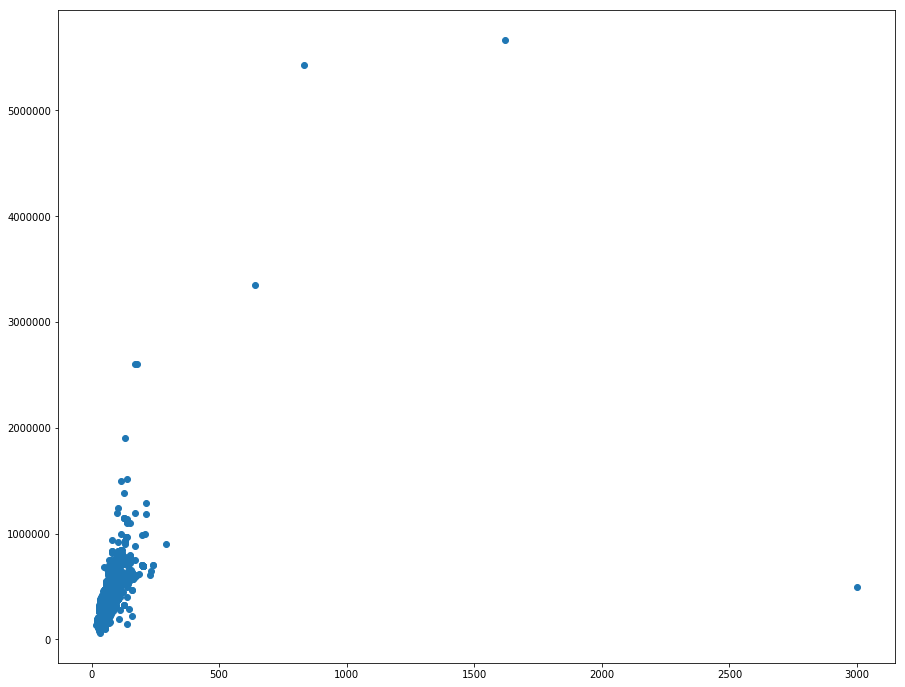

In [95]:
""" Sprawdzam outliersy dla Powierzni i Ceny. """

plt.figure(figsize=(15,12))
plt.scatter(x = houses.Powierzchnia, y = houses.Cena)

In [0]:
""" Usuwam outliersy dla powierzchni wiekszej niz 500 oraz dla Ceny wiekszej niz 1800000. """

houses.drop(houses[(houses['Powierzchnia'] >500)].index,inplace = True)
houses.drop(houses[(houses['Cena']>1800000)].index,inplace = True)

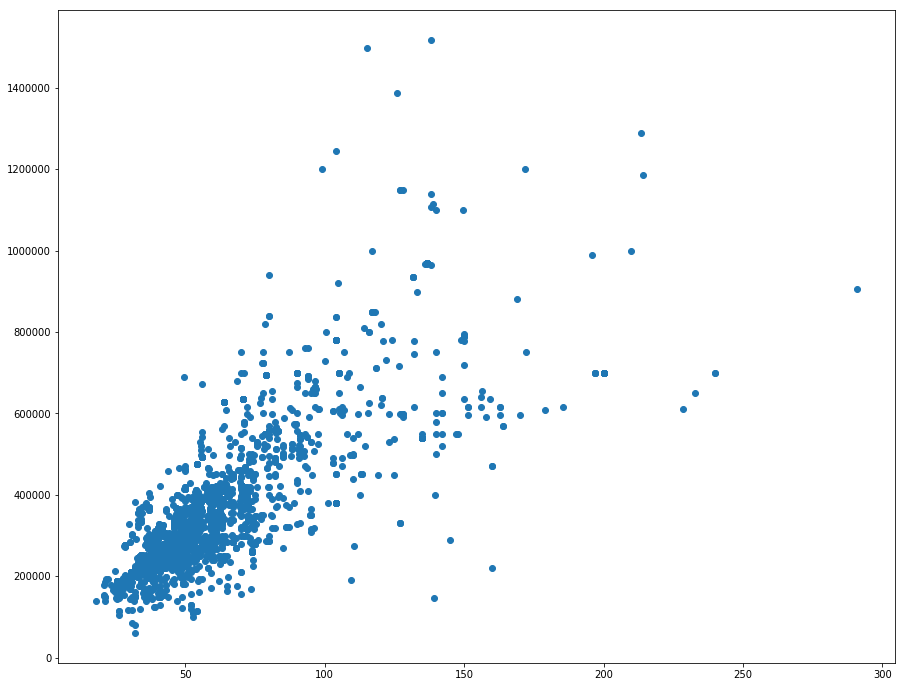

In [97]:
""" Kolejna analiza outliers dla Powierzchni i Ceny."""

plt.figure(figsize=(15,12))
plt.scatter(x = houses.Powierzchnia, y = houses.Cena)

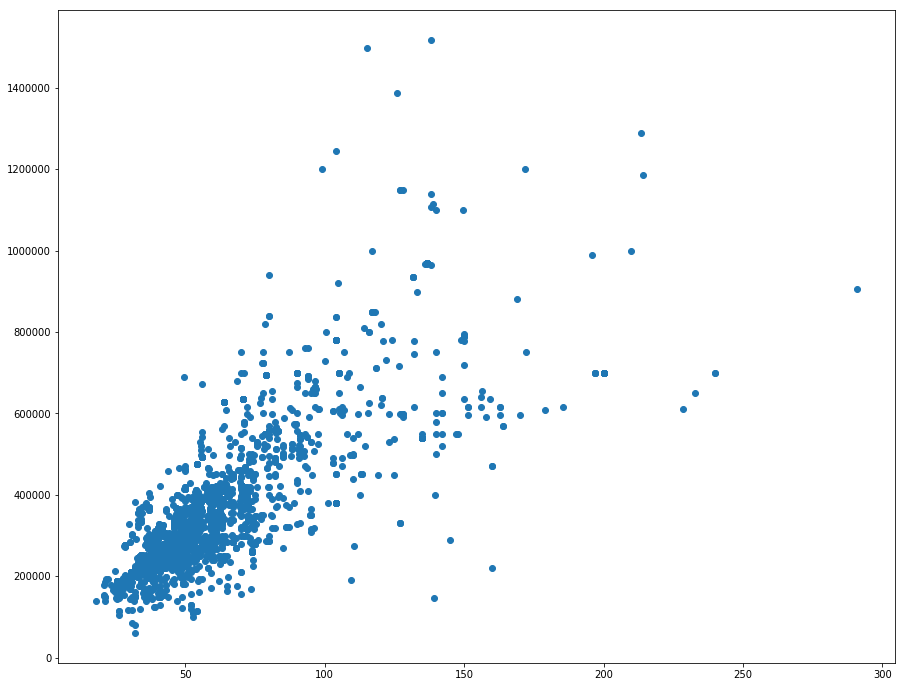

In [98]:
""" Sprawdzam ponownie outliers dla Powierzchni i Ceny. """
plt.figure(figsize=(15,12))
plt.scatter(x = houses.Powierzchnia, y = houses.Cena)

In [0]:
""" Usuwam kolejne outliersy dla Ceny>1400000, dla Powierzchni>130 i jednoczenie przy Cenie<200000."""

houses.drop(houses[(houses['Cena']>1400000)].index,inplace = True)
houses.drop(houses[(houses['Powierzchnia'] >130) & (houses['Cena']<200000)].index,inplace = True)

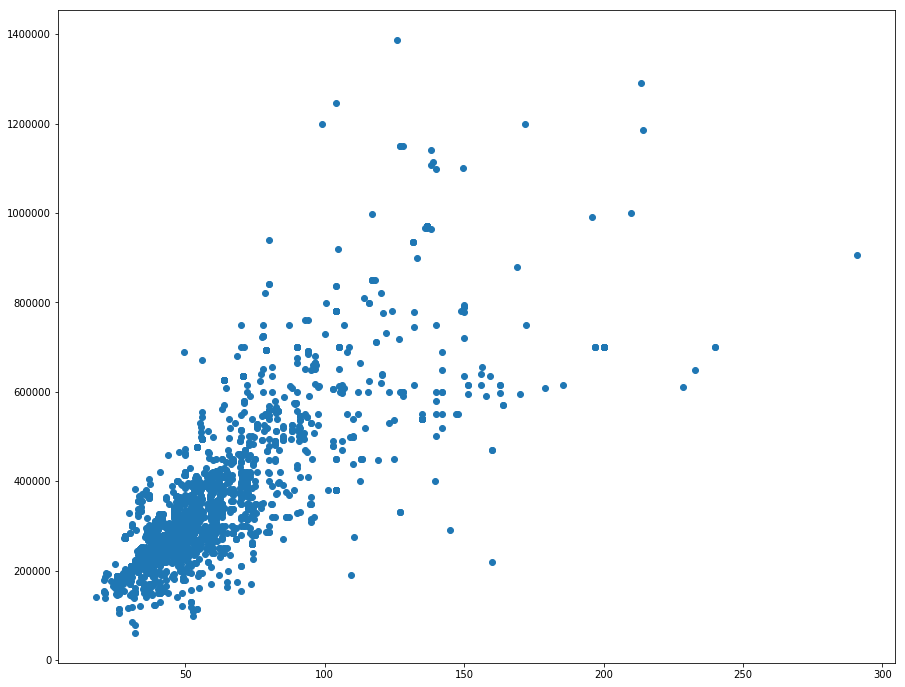

In [100]:
""" Sprawdzam outliersy dla Ceny. """

plt.figure(figsize=(15,12))
plt.scatter(x = houses.Powierzchnia, y = houses.Cena)

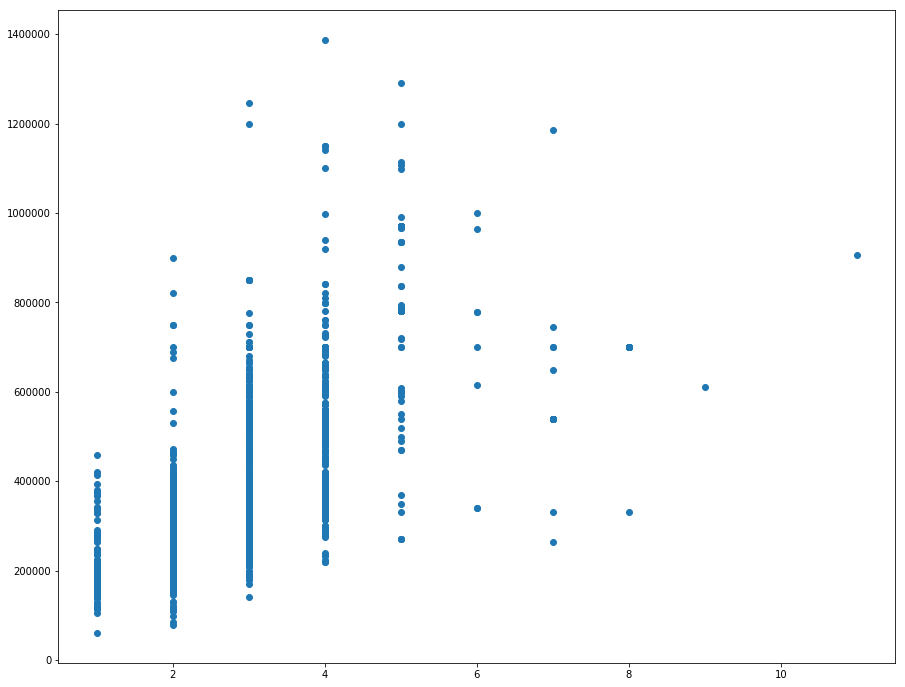

In [101]:
""" Sprawdzam outliersy dla Liczby pokoi. """

plt.figure(figsize=(15,12))
plt.scatter(x = houses['Liczba pokoi'], y = houses.Cena)

In [0]:
""" Usuwam outliers dla liczby pokoi >10. """

houses.drop(houses[(houses['Liczba pokoi'] > 10)].index,inplace = True)

In [0]:
""" Tworze zbior treningowy i testowy.
    Podzialu zbioru dokonuje na czesc train - 80% danych calego zbioru i czesc test - 20%.
"""

X_train, X_test, y_train, y_test = train_test_split(
    houses.drop('Cena', axis=1),
    houses['Cena'],
    test_size = 0.2,
    random_state = 42)

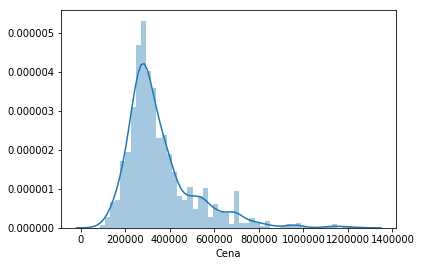

In [104]:
"""Tworze wykresy rozkadu cen. """

sns.distplot(y_train)
quantitative = [f for f in X_train.columns if X_train.dtypes[f] != 'object']
qualitative = [f for f in X_train.columns if X_train.dtypes[f] == 'object']

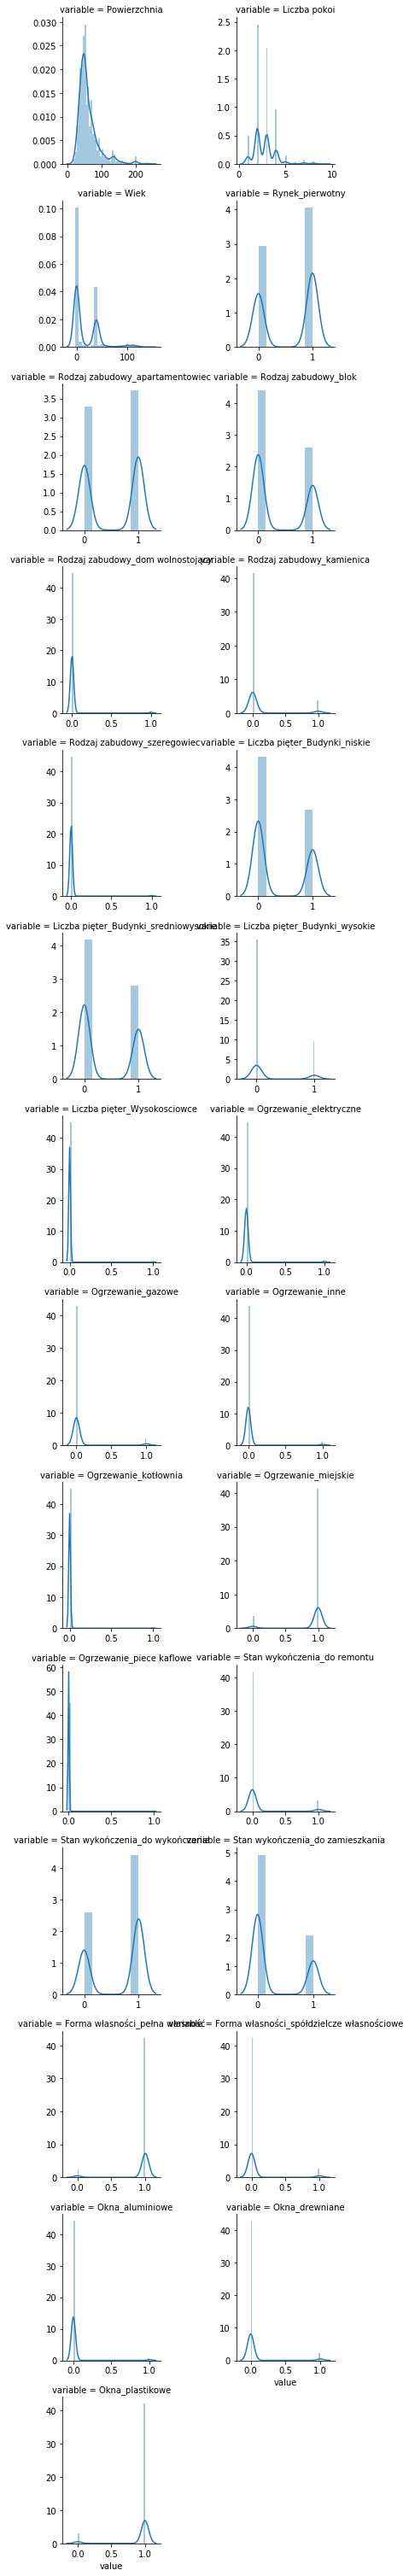

In [105]:
"""Tworze wykresy rozkladu zmiennych. """

f = pd.melt(X_train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

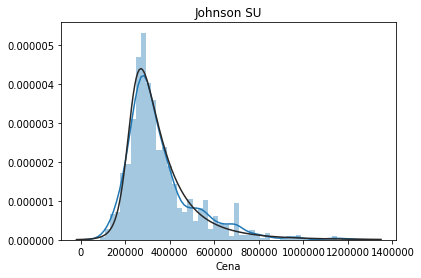

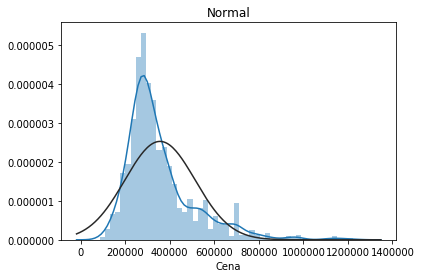

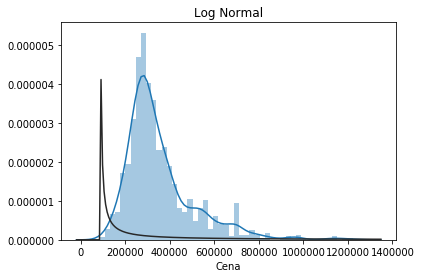

In [106]:
""" Poszukuje najlepszego dopasowania do dystybucji ceny. """

y =  y_train
plt.figure(1);plt.title('Johnson SU')
sns.distplot(y,fit = st.johnsonsu)
plt.figure(2);plt.title('Normal')
sns.distplot(y, fit = st.norm)
plt.figure(3);plt.title('Log Normal')
sns.distplot(y, fit = st.lognorm)

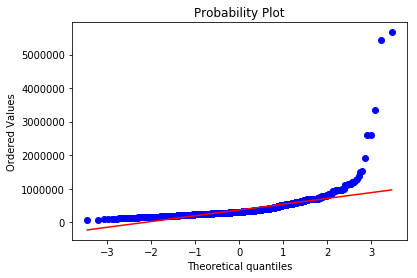

In [107]:
fig = plt.figure()
stats.probplot(data['Cena'], plot=plt)
plt.show()

In [108]:
""" Mamy wiec skosnosc rozkladu, zatem logarytm bedzie najlepsza transforamcja przed uzyciem algorytmu regresji. 
    Sprawdzilam tez rozklad Johnson, ale lepsze wyniki wychodza przy zastosowaniu logarytmu i tego uzywam w dalszej czesci.
"""

' Mamy wiec skosnosc rozkladu, zatem logarytm bedzie najlepsza transforamcja przed uzyciem algorytmu regresji. \n    Sprawdzilam tez rozklad Johnson, ale lepsze wyniki wychodza przy zastosowaniu logarytmu i tego uzywam w dalszej czesci.\n'

In [0]:
"""Skalownie danych. Ostatecznie jednak nie zastosowalam StandardScalera, bo wyniki sa lepsze bez uzycia Stadardscalera.
   Ponizej przedstawiam jednak fragment kodu pozwalajacy zastosowac Standardscaler. 
"""

#from sklearn.preprocessing import StandardScaler 

#scaler = StandardScaler() #bez scalera wyniki sa lepsze

#reg_scaler = StandardScaler().fit(X_train)
#transform_X_train = reg_scaler.transform(X_train)
#transform_X_test = reg_scaler.transform(X_test)

""" Redukcja wymiarowosci przy uzyciu PCA. Metoda prob wywnioskowalam, ze najlepsze wyniki otrzymuje dla n_components=15."""

pca = PCA(random_state = 42, n_components=15)

#dla scalera
#X_train_r = pca.fit_transform(transform_X_train)
#X_test_r = pca.transform(transform_X_test)

#bez skalera
X_train_r = pca.fit_transform(X_train)
X_test_r = pca.transform(X_test)


In [110]:
X_train_r

array([[ 1.53945573e+01,  3.07733884e+01, -8.29887762e-01, ...,
         3.34403801e-02,  3.77849389e-02,  1.51899687e-02],
       [-1.64948750e+01,  9.07643692e+00,  2.72713105e-01, ...,
         2.86883060e-02, -2.83273574e-02, -4.99218205e-02],
       [ 1.16838608e+01, -1.89754963e+01, -1.00015334e+00, ...,
         3.49615533e-01,  8.43769056e-01, -8.62188922e-02],
       ...,
       [-1.73458258e+01,  8.49298439e+00,  8.28685211e-01, ...,
         4.10343581e-02, -1.35695339e-02, -4.58948076e-02],
       [-4.02940350e+00, -2.96783919e+01,  2.75877185e-01, ...,
        -1.39919324e-01, -2.07962232e-01,  2.31745701e-01],
       [-3.78097504e+01, -4.27332420e+00, -1.24253121e-01, ...,
         6.52781706e-02,  8.19489044e-03, -1.66567983e-02]])

In [0]:
"""Zastosowanie wczesniej wspomnianego logarytmowania cen."""

y_train_r = np.array(y_train)
y_test_r = np.array(y_test)
yl_train = np.log(y_train_r)
yl_test = np.log(y_test_r)

In [112]:
"""Wybor i uczenie modelu.
   Analizuje kilka modeli, aby wybrac ten najlepszy.
   Do wyregulowania modeli, dobierania optymalnych parametrow, zastosuje GridSearchCV.
   Parametry dobieram metoda prob.
"""

'Wybor i uczenie modelu.\n   Analizuje kilka modeli, aby wybrac ten najlepszy.\n   Do wyregulowania modeli, dobierania optymalnych parametrow, zastosuje GridSearchCV.\n   Parametry dobieram metoda prob.\n'

In [113]:
"""XGBoost"""

'XGBoost'

In [114]:
xgb_clf = xgb.XGBRegressor(random_seed=42) 
parameters = {'n_estimators': [50, 100, 200, 300], 'max_depth':[7, 8,9,10]}
grid_0 = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=10, n_jobs=-1)
print("parameters:")
print(parameters)
grid_0.fit(X_train_r, yl_train)
print("Best score: %0.3f" % grid_0.best_score_)
print(grid_0.best_params_)
grid_0.best_estimator_


parameters:
{'n_estimators': [50, 100, 200, 300], 'max_depth': [7, 8, 9, 10]}
[18:54:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score: 0.842
{'max_depth': 8, 'n_estimators': 100}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_seed=42,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [115]:
"""Metoda elastycznej siatki (Elastic Net)"""

'Metoda elastycznej siatki (Elastic Net)'

In [116]:
 grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 3, 5],
                    'elasticnet__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train_r, yl_train)
print("Best score: %0.3f" % grid_1.best_score_)
print(grid_1.best_params_)
grid_1.best_estimator_


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.935532101266112, tolerance: 24.305272166599114
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.052906780795457, tolerance: 24.233691662966425
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.98505578876898, tolerance: 23.92803423357938
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.910661467

Best score: 0.776
{'elasticnet__alpha': 0.1, 'polynomialfeatures__degree': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.398480353526814, tolerance: 30.7800778743909
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('elasticnet',
                 ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.1, warm_start=False))],
         verbose=False)

In [117]:
"""Regresja Lasso"""

'Regresja Lasso'

In [118]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 3, 5],
                    'lasso__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]},
                    cv=5,
                    refit=True)
grid_2.fit(X_train_r, yl_train)
print("Best score: %0.3f" % grid_2.best_score_)
print(grid_2.best_params_)
grid_2.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.93083999669179, tolerance: 24.305272166599114
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.880958528828664, tolerance: 24.233691662966425
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.833950272888973, tolerance: 23.92803423357938
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.702340584

Best score: 0.772
{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.1, warm_start=False))],
         verbose=False)

In [119]:
"""Regresja grzbietowa (Ridge)."""

'Regresja grzbietowa (Ridge).'

In [120]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [5, 10, 30, 40, 50, 60]},
                    cv=5,
                    refit=True)
grid_3.fit(X_train_r, yl_train)
print("Best score: %0.3f" % grid_3.best_score_)
print(grid_3.best_params_)
grid_3.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189

Best score: 0.803
{'polynomialfeatures__degree': 2, 'ridge__alpha': 30}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.42352e-19): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.1))],
         verbose=False)

In [121]:
"""Regresja wielomianowa"""

'Regresja wielomianowa'

In [122]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X_train_r, yl_train)
print(grid_4.best_params_)
print("Best score: %0.3f" % grid_4.best_score_)
print(grid_4.best_params_)
grid_4.best_estimator_

{'polynomialfeatures__degree': 1}
Best score: 0.720
{'polynomialfeatures__degree': 1}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [123]:
"""Lasy losowe."""

'Lasy losowe.'

In [157]:
grid_5 = GridSearchCV(RandomForestRegressor(n_jobs = -1, max_features = 'sqrt', n_estimators = 50, oob_score = True),
                   param_grid={
                   'n_estimators': [100, 200, 300, 400, 500],
                    'max_features': ['auto', 'sqrt', 'log2'],  
                    'max_depth': [200, 300, 400, 500, 600]
                   },
                    cv=kfold,
                    refit=True)
grid_5.fit(X_train_r, yl_train)
print("Best score: %0.3f" % grid_5.best_score_)
print(grid_5.best_params_)
grid_5.best_estimator_



Best score: 0.834
{'max_depth': 300, 'max_features': 'auto', 'n_estimators': 200}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=300,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
e = 2.7182818

In [126]:
""" 
    Wyliczenie wartosci miar na zbiorze train.
    Z uwagi na logarytmowanie zastosowalam funkcje odwrotna.
"""

models = []
models.append(('XGBoost', grid_0.best_estimator_))
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('RFR', grid_5.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2 train: {}".format(metrics.r2_score(y_train, e ** model.predict(X_train_r)) ))
    print("Explained variance score train: {}".format( metrics.explained_variance_score(y_train, e ** model.predict(X_train_r)) ))
    print("Median absolute error train: {}".format( metrics.median_absolute_error(y_train, e ** model.predict(X_train_r)) ))
    print("Mean squared error train: {}".format( metrics.mean_squared_error(y_train, e ** model.predict(X_train_r)) ))
    print("Mean absolute errors train: {}".format(metrics.mean_absolute_error(y_train, e ** model.predict(X_train_r)) ))
    r2.append(metrics.r2_score(y_train, e ** model.predict(X_train_r)))
    explained_variance_score.append(metrics.explained_variance_score(y_train, e ** model.predict(X_train_r)))
    median_absolute_error.append( metrics.median_absolute_error(y_train, e ** model.predict(X_train_r)))
    mean_squared_error.append(metrics.mean_squared_error(y_train, e ** model.predict(X_train_r)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_train, e ** model.predict(X_train_r)))

XGBoost
R^2 train: 0.9822856469030063
Explained variance score train: 0.9824437512547142
Median absolute error train: 7892.40625
Mean squared error train: 442208393.54006714
Mean absolute errors train: 12996.457065631139
ElasticNet
R^2 train: 0.8182296944264226
Explained variance score train: 0.8195165221230808
Median absolute error train: 28631.994824217894
Mean squared error train: 4537583415.034236
Mean absolute errors train: 42276.20552103865
Lasso
R^2 train: 0.841609523226576
Explained variance score train: 0.8426880951195873
Median absolute error train: 27162.580057749758
Mean squared error train: 3953946153.298031
Mean absolute errors train: 40206.370588209465
Ridge
R^2 train: 0.831417203719168
Explained variance score train: 0.8324248387642873
Median absolute error train: 26819.271734226262
Mean squared error train: 4208379900.3922386
Mean absolute errors train: 40712.98194715062
LR
R^2 train: 0.5695649220946204
Explained variance score train: 0.5709005794936555
Median absolute

In [127]:
"""Prezentacja wynikow w tabeli."""

d = {'r2 train': r2, 
     'explained_variance_score train': explained_variance_score, 
     'median_absolute_error train': median_absolute_error,
     'mean_squared_error train' : mean_squared_error,
     'mean_absolute_error train' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['XGBoost','ElasticNet','Lasso','Ridge','LR','RFR'])
df

,Method,r2 train,explained_variance_score train,median_absolute_error train,mean_squared_error train,mean_absolute_error train
0,XGBoost,0.982286,0.982444,7892.406250,4.422084e+08,12996.457066
1,ElasticNet,0.818230,0.819517,28631.994824,4.537583e+09,42276.205521
2,Lasso,0.841610,0.842688,27162.580058,3.953946e+09,40206.370588
3,Ridge,0.831417,0.832425,26819.271734,4.208380e+09,40712.981947
4,LR,0.569565,0.570901,35473.609078,1.074507e+10,57506.995086
5,RFR,0.971013,0.971219,6441.391163,7.236064e+08,13549.050449


In [128]:
""" Wyznaczanie wartosci miar dla probki testowej."""

models = []
models.append(('XGBoost', grid_0.best_estimator_))
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('RFR', grid_5.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2 test: {}".format(metrics.r2_score(y_test, e ** model.predict(X_test_r)) ))
    print("Explained variance score test: {}".format( metrics.explained_variance_score(y_test, e ** model.predict(X_test_r)) ))
    print("Median absolute error test: {}".format( metrics.median_absolute_error(y_test, e ** model.predict(X_test_r)) ))
    print("Mean squared error test: {}".format( metrics.mean_squared_error(y_test, e ** model.predict(X_test_r)) ))
    print("Mean absolute errors test: {}".format(metrics.mean_absolute_error(y_test, e ** model.predict(X_test_r)) ))
    r2.append(metrics.r2_score(y_test, e ** model.predict(X_test_r)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, e ** model.predict(X_test_r)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, e ** model.predict(X_test_r)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, e ** model.predict(X_test_r)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, e ** model.predict(X_test_r)))

XGBoost
R^2 test: 0.8662343251876221
Explained variance score test: 0.8668413041908904
Median absolute error test: 12495.890625
Mean squared error test: 4160601232.265537
Mean absolute errors test: 32888.63380821078
ElasticNet
R^2 test: 0.7487622440373864
Explained variance score test: 0.7488793335409476
Median absolute error test: 28880.25654209753
Mean squared error test: 7814412169.009982
Mean absolute errors test: 47167.445303852284
Lasso
R^2 test: 0.7469726044278304
Explained variance score test: 0.747069980965716
Median absolute error test: 27713.03888142621
Mean squared error test: 7870076499.753083
Mean absolute errors test: 45818.07022673358
Ridge
R^2 test: 0.8222777072057781
Explained variance score test: 0.8225093497122673
Median absolute error test: 25858.880104993645
Mean squared error test: 5527812657.752715
Mean absolute errors test: 43694.4730249707
LR
R^2 test: 0.468033005342935
Explained variance score test: 0.4704464767339057
Median absolute error test: 34836.0937763

In [129]:
"""Prezentacja wynikow w tabeli."""

d = {'r2 test': r2, 
     'explained_variance_score test': explained_variance_score, 
     'median_absolute_error test': median_absolute_error,
     'mean_squared_error test' : mean_squared_error,
     'mean_absolute_error test' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['XGBoost','ElasticNet','Lasso','Ridge','LR','RFR'])
df

,Method,r2 test,explained_variance_score test,median_absolute_error test,mean_squared_error test,mean_absolute_error test
0,XGBoost,0.866234,0.866841,12495.890625,4.160601e+09,32888.633808
1,ElasticNet,0.748762,0.748879,28880.256542,7.814412e+09,47167.445304
2,Lasso,0.746973,0.747070,27713.038881,7.870076e+09,45818.070227
3,Ridge,0.822278,0.822509,25858.880105,5.527813e+09,43694.473025
4,LR,0.468033,0.470446,34836.093776,1.654612e+10,63738.294284
5,RFR,0.863137,0.863765,12291.908650,4.256948e+09,32617.863846


In [158]:
"""Wspolczynnik R^2 na train i test, czyli jakosc dopasowania modeli do proby, najlepszy jest dla XGBoost i RFR. Wartosci te sa najblizej 1,
   wiec najlepiej sposrod wskazanych modeli opisuja zmiennosc cen.
   
   Najnizsze miary bledow dopasowania dla train i test okreslajace stopien odchylenia dopasowanej ceny od rzeczywistej ceny sa na RFR i XGBoost.
   Roznice pomiedzy XGBoost i RFR na test nie sa znaczace.
   
   W kolejnych krokach jako najlepszy model wybieram RFR, porownam jednak rowniez ceny na wszystkich zastosowanych modelach.
"""

'Wspolczynnik R^2 na train i test, czyli jakosc dopasowania modeli do proby, najlepszy jest dla XGBoost i RFR. Wartosci te sa najblizej 1,\n   wiec najlepiej sposrod wskazanych modeli opisuja zmiennosc cen.\n   \n   Najnizsze miary bledow dopasowania dla train i test okreslajace stopien odchylenia dopasowanej ceny od rzeczywistej ceny sa na RFR i XGBoost.\n   Roznice pomiedzy XGBoost i RFR na test nie sa znaczace.\n   \n   W kolejnych krokach jako najlepszy model wybieram RFR, porownam jednak rowniez ceny na wszystkich zastosowanych modelach.\n'

In [0]:
"""Wybor najlepszego modelu."""

best_model = grid_5

In [132]:
""" Sprawdzam wyniki na przykladowych danych na train na najlepszym modelu."""

some_data = X_train_r[:10]
some_labels = y_train[:10]

df1=pd.DataFrame({'Prognozy train' : e ** (best_model.predict(some_data)).round(2),
              'Etykiety (Cena) train' : list(some_labels),
              'Roznica' : (e ** (best_model.predict(some_data))-list(some_labels)).round(2),
              '% bledu do ceny' : ((e ** (best_model.predict(some_data))-list(some_labels)).round(2)*100/list(some_labels)).round(0)
             })

df1

,Prognozy train,Etykiety (Cena) train,Roznica,% bledu do ceny
0,529664.921503,537254.0,-6506.90,-1.0
1,331041.778998,343875.0,-12297.67,-4.0
2,404335.341088,385000.0,20454.60,5.0
3,388481.125756,380000.0,10319.43,3.0
4,344551.850145,326598.0,16878.22,5.0
5,271034.085587,270000.0,-115.74,-0.0
6,358613.277749,360000.0,-117.87,-0.0
7,215345.688941,206700.0,9038.48,4.0
8,358613.277749,361914.0,-3936.37,-1.0
9,334368.804154,345792.0,-11181.34,-3.0


In [133]:
""" Sprawdzam wyniki na przykladowych danych na probce test dla wybranego najlepszego modelu. """

some_data = X_test_r[:10]
some_labels = y_test[:10]

df2=pd.DataFrame({'Prognozy test' : e ** (best_model.predict(some_data)).round(2),
              'Etykiety (Cena) test' : list(some_labels),
              'Roznica' : (e ** (best_model.predict(some_data))-list(some_labels)).round(2),
            '% bledu do ceny' : ((e ** (best_model.predict(some_data))-list(some_labels)).round(2)*100/list(some_labels)).round(0)
             })


df2

,Prognozy test,Etykiety (Cena) test,Roznica,% bledu do ceny
0,242801.585977,198600.0,43261.86,22.0
1,293607.719570,270000.0,24866.90,9.0
2,305590.077786,310734.0,-3872.03,-1.0
3,305590.077786,290136.0,16883.99,6.0
4,373248.563093,399000.0,-25015.39,-6.0
5,634124.039465,636300.0,-1404.30,-0.0
6,299538.988884,283800.0,14460.15,5.0
7,446859.659653,443450.0,1409.69,0.0
8,169396.919107,205000.0,-34917.68,-17.0
9,334368.804154,318777.0,15833.66,5.0


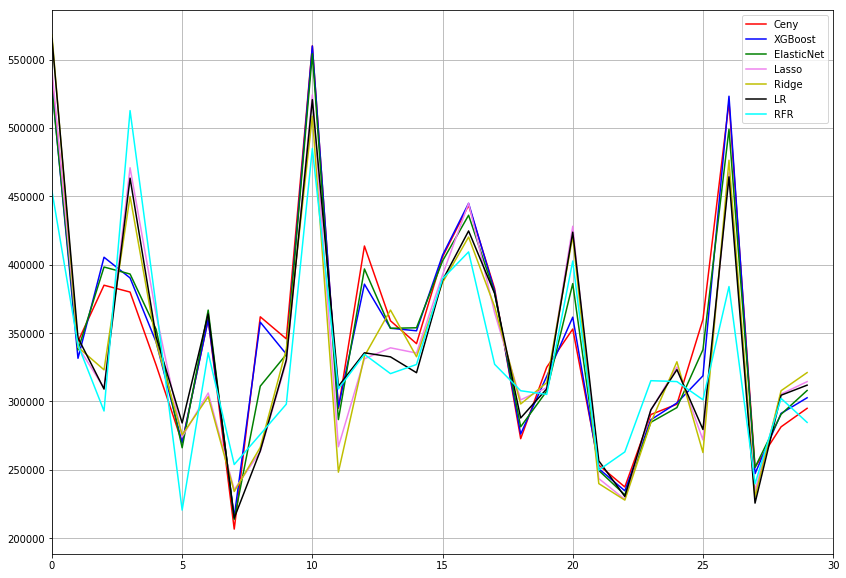

In [134]:
""" Wizualizacja wynikow dla ceny rzeczywistej oraz ceny wynikajacej z poszczegolnych modeli."""

size = 15
plt.figure(figsize=(14,10))
wlk = 30

Ceny_w = []
RFR_w = []
XGBoost_w = []
Lasso_w = []
Ridge_w = []
LR_w = []


Etykiety = ['Ceny', 'XGBoost', 'ElasticNet', 'Lasso', 'Ridge', 'LR', 'RFR']

y_wyk = y_train[: wlk] 
for el in y_wyk:
    Ceny_w.append(round(el, 0))
    
x_wyk = X_train_r[: wlk]

XGBoost_w = np.around(e ** grid_0.best_estimator_.predict(x_wyk), decimals = 0, out = None)
ElasticNet_w = np.around(e ** grid_1.best_estimator_.predict(x_wyk), decimals = 0, out = None)
Lasso_w = np.around(e ** grid_2.best_estimator_.predict(x_wyk), decimals = 0, out = None)
Ridge_w = np.around(e ** grid_3.best_estimator_.predict(x_wyk), decimals = 0, out = None)
LR_w = np.around(e ** grid_4.best_estimator_.predict(x_wyk), decimals = 0, out = None)
RFR_w = np.around(e ** grid_5.best_estimator_.predict(x_wyk), decimals = 0, out = None)


plt.plot(Ceny_w,  'r', RFR_w, 'b', XGBoost_w, 'g', ElasticNet_w, 'violet', Lasso_w, 'y', Ridge_w, 'black', LR_w, 'cyan')
plt.legend(Etykiety, loc="upper right")
plt.xlim(0, wlk)
plt.grid(True)
plt.show()

In [135]:
"""Przedstawienie w tabeli wynikow dla ceny rzeczywistej oraz ceny wynikajacej z poszczegolnych modeli na probce train."""

Ceny_df = pd.DataFrame(Ceny_w)
RFR_df = pd.DataFrame(RFR_w)
XGBoost_df = pd.DataFrame(XGBoost_w)
ElasticNet_df = pd.DataFrame(ElasticNet_w)
Lasso_df = pd.DataFrame(Lasso_w)
Ridge_df = pd.DataFrame(Ridge_w)
LR_df = pd.DataFrame(LR_w)

porownanie = pd.concat([Ceny_df, RFR_df, XGBoost_df, ElasticNet_df, Lasso_df, Ridge_df, LR_df], axis=1)
porownanie.columns = ['Ceny', 'RFR', 'XGBoost', 'ElasticNet', 'Lasso', 'Ridge', 'LR']
porownanie

,Ceny,RFR,XGBoost,ElasticNet,Lasso,Ridge,LR
0,537254.0,530747.0,528912.0,542143.0,568010.0,565457.0,453900.0
1,343875.0,331577.0,337685.0,340052.0,339707.0,346536.0,341384.0
2,385000.0,405455.0,398310.0,309816.0,323125.0,309071.0,293040.0
3,380000.0,390319.0,393175.0,470874.0,449936.0,463273.0,512661.0
4,326598.0,343476.0,352747.0,363750.0,343342.0,347267.0,369615.0
5,270000.0,269884.0,266158.0,274156.0,275561.0,284290.0,220582.0
6,360000.0,359882.0,366799.0,306189.0,303461.0,363998.0,335607.0
7,206700.0,215738.0,213760.0,235512.0,234186.0,214758.0,253914.0
8,361914.0,357978.0,311199.0,263377.0,266416.0,263892.0,275946.0
9,345792.0,334611.0,334420.0,328880.0,338351.0,330437.0,298050.0


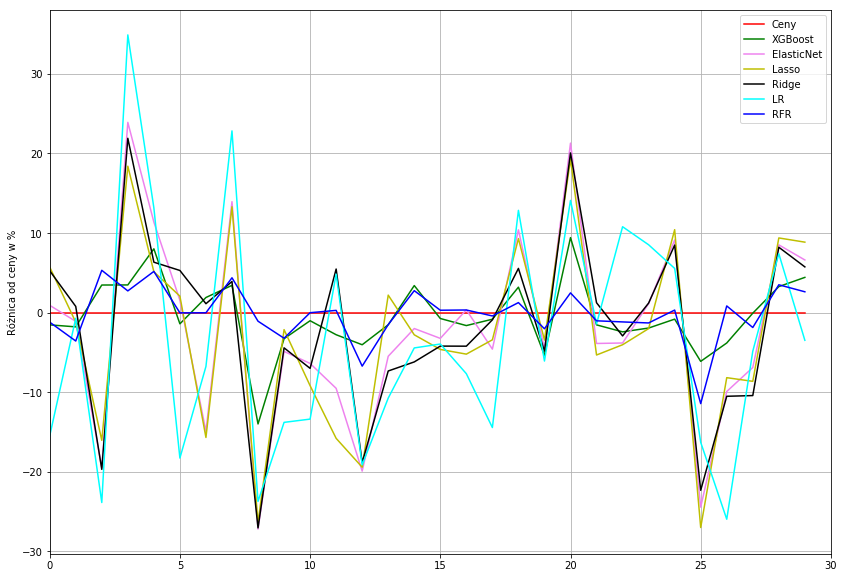

In [136]:
""" Wizualizacja odchylenia ceny rzeczywistej od ceny dla poszczegolnych modeli na probce train."""

size = 15
plt.figure(figsize=(14,10))


Ceny_wr = []
RFR_wr = []
XGBoost_wr = []
ElasticNet_wr = []
Lasso_wr = []
Ridge_wr = []
LR_wr = []

Etykiety = ['Ceny', 'XGBoost', 'ElasticNet', 'Lasso', 'Ridge', 'LR', 'RFR']

for i in range(0, wlk):
    Ceny_wr.append(Ceny_w[i] - Ceny_w[i])
    XGBoost_wr.append(np.around(((XGBoost_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    ElasticNet_wr.append(np.around(((ElasticNet_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    Lasso_wr.append(np.around(((Lasso_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    Ridge_wr.append(np.around(((Ridge_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    LR_wr.append(np.around(((LR_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    RFR_wr.append(np.around(((RFR_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    

plt.ylabel("Różnica od ceny w %") 
plt.plot(Ceny_wr,  'r', XGBoost_wr, 'g', ElasticNet_wr, 'violet', Lasso_wr, 'y', Ridge_wr, 'black', LR_wr, 'cyan', RFR_wr, 'b')
plt.legend(Etykiety, loc="upper right")
plt.xlim(0, wlk)
plt.grid(True)
plt.show()

In [137]:
""" Przedstawienie w tabeli odchylenie ceny rzeczywistej od ceny przewidywanych dla poszczegolnych modeli w procentach na probnce train (30 pozycji dla przejrzystosci)."""

Ceny_r_df = pd.DataFrame(Ceny_wr)
RFR_r_df = pd.DataFrame(RFR_wr)
XGBoost_r_df = pd.DataFrame(XGBoost_wr)
ElasticNet_r_df = pd.DataFrame(ElasticNet_wr)
Lasso_r_df = pd.DataFrame(Lasso_wr)
Ridge_r_df = pd.DataFrame(Ridge_wr)
LR_r_df = pd.DataFrame(LR_wr)

porownanie_r = pd.concat([Ceny_r_df, RFR_r_df, XGBoost_r_df, ElasticNet_r_df, Lasso_r_df, Ridge_r_df, LR_r_df], axis=1)
porownanie_r.columns = ['Ceny', 'RFR', 'XGBoost', 'ElasticNet', 'Lasso', 'Ridge', 'LR']
porownanie_r

,Ceny,RFR,XGBoost,ElasticNet,Lasso,Ridge,LR
0,0.0,-1.21,-1.55,0.91,5.72,5.25,-15.51
1,0.0,-3.58,-1.80,-1.11,-1.21,0.77,-0.72
2,0.0,5.31,3.46,-19.53,-16.07,-19.72,-23.89
3,0.0,2.72,3.47,23.91,18.40,21.91,34.91
4,0.0,5.17,8.01,11.38,5.13,6.33,13.17
5,0.0,-0.04,-1.42,1.54,2.06,5.29,-18.30
6,0.0,-0.03,1.89,-14.95,-15.71,1.11,-6.78
7,0.0,4.37,3.42,13.94,13.30,3.90,22.84
8,0.0,-1.09,-14.01,-27.23,-26.39,-27.08,-23.75
9,0.0,-3.23,-3.29,-4.89,-2.15,-4.44,-13.81


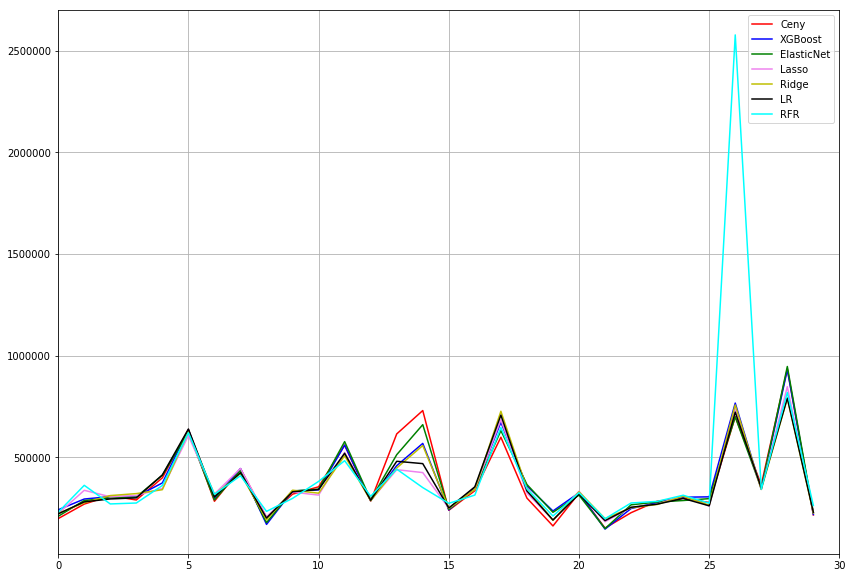

In [138]:
""" Przedstawienie odchylenie ceny rzeczywistej od ceny przewidywanych dla poszczegolnych modeli w procentach na probnce test (30 pozycji dla przejrzystosci)."""

size = 15
plt.figure(figsize=(14,10))
wlk = 30

Ceny_w = []
RFR_w = []
XGBoost_w = []
Lasso_w = []
Ridge_w = []
LR_w = []

Etykiety = ['Ceny', 'XGBoost', 'ElasticNet', 'Lasso', 'Ridge', 'LR', 'RFR']

y_wyk = y_test[: wlk] 
for el in y_wyk:
    Ceny_w.append(round(el, 0))
    
x_wyk = X_test_r[: wlk]

XGBoost_w = np.around(e ** grid_0.best_estimator_.predict(x_wyk), decimals = 0, out = None)
ElasticNet_w = np.around(e ** grid_1.best_estimator_.predict(x_wyk), decimals = 0, out = None)
Lasso_w = np.around(e ** grid_2.best_estimator_.predict(x_wyk), decimals = 0, out = None)
Ridge_w = np.around(e ** grid_3.best_estimator_.predict(x_wyk), decimals = 0, out = None)
LR_w = np.around(e ** grid_4.best_estimator_.predict(x_wyk), decimals = 0, out = None)
RFR_w = np.around(e ** grid_5.best_estimator_.predict(x_wyk), decimals = 0, out = None)

plt.plot(Ceny_w,  'r', RFR_w, 'b', XGBoost_w, 'g', ElasticNet_w, 'violet', Lasso_w, 'y', Ridge_w, 'black', LR_w, 'cyan')
plt.legend(Etykiety, loc="upper right")
plt.xlim(0, wlk)
plt.grid(True)
plt.show()

In [139]:
""" Przedstawienie wynikow w tabeli na probce test."""

Ceny_df = pd.DataFrame(Ceny_w)
RFR_df = pd.DataFrame(RFR_w)
XGBoost_df = pd.DataFrame(XGBoost_w)
ElasticNet_df = pd.DataFrame(ElasticNet_w)
Lasso_df = pd.DataFrame(Lasso_w)
Ridge_df = pd.DataFrame(Ridge_w)
LR_df = pd.DataFrame(LR_w)

porownanie = pd.concat([Ceny_df, RFR_df, XGBoost_df, ElasticNet_df, Lasso_df, Ridge_df, LR_df], axis=1)
porownanie.columns = ['Ceny', 'RFR', 'XGBoost', 'ElasticNet', 'Lasso', 'Ridge', 'LR']
porownanie

,Ceny,RFR,XGBoost,ElasticNet,Lasso,Ridge,LR
0,198600.0,241862.0,209824.0,223228.0,224171.0,221920.0,230047.0
1,270000.0,294867.0,287456.0,337721.0,276476.0,281030.0,362224.0
2,310734.0,306862.0,299874.0,305867.0,311810.0,295215.0,270719.0
3,290136.0,307020.0,304902.0,312164.0,321530.0,300539.0,275266.0
4,399000.0,373985.0,411542.0,346625.0,340732.0,413441.0,361400.0
5,636300.0,634896.0,623966.0,606299.0,625817.0,639134.0,620792.0
6,283800.0,298260.0,290396.0,319548.0,315445.0,305417.0,318105.0
7,443450.0,444860.0,436184.0,444938.0,420241.0,424678.0,409363.0
8,205000.0,170082.0,178743.0,207485.0,192586.0,201421.0,234039.0
9,318777.0,334611.0,334420.0,328880.0,338351.0,330437.0,298050.0


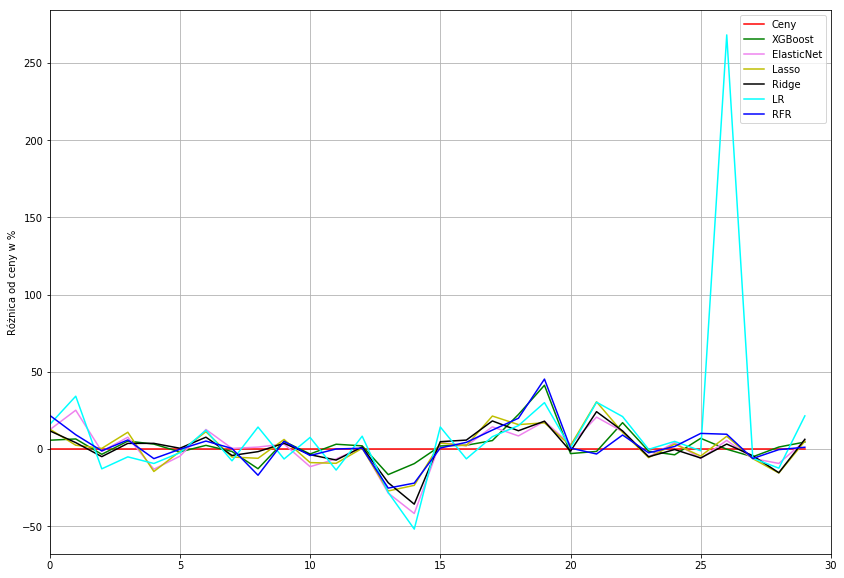

In [140]:
""" Wizualizacja odchylenia ceny rzeczywistej od ceny dla poszczegolnych modeli na probce test (30 pozycji)."""
size = 15
plt.figure(figsize=(14,10))


Ceny_wr = []
RFR_wr = []
XGBoost_wr = []
ElasticNet_wr = []
Lasso_wr = []
Ridge_wr = []
LR_wr = []

Etykiety = ['Ceny', 'XGBoost', 'ElasticNet', 'Lasso', 'Ridge', 'LR', 'RFR']

for i in range(0, wlk):
    Ceny_wr.append(Ceny_w[i] - Ceny_w[i])
    XGBoost_wr.append(np.around(((XGBoost_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    ElasticNet_wr.append(np.around(((ElasticNet_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    Lasso_wr.append(np.around(((Lasso_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    Ridge_wr.append(np.around(((Ridge_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    LR_wr.append(np.around(((LR_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    RFR_wr.append(np.around(((RFR_w[i] - Ceny_w[i]) / Ceny_w[i]) * 100, decimals = 2, out = None))
    

plt.ylabel("Różnica od ceny w %") 
plt.plot(Ceny_wr,  'r', XGBoost_wr, 'g', ElasticNet_wr, 'violet', Lasso_wr, 'y', Ridge_wr, 'black', LR_wr, 'cyan', RFR_wr, 'b')
plt.legend(Etykiety, loc="upper right")
plt.xlim(0, wlk)
plt.grid(True)
plt.show()

In [141]:
""" Przedstawienie odchylen od ceny rzeczywistej dla poszczegolnych modeli na probce test w  procentach (30 pozycji)."""

Ceny_r_df = pd.DataFrame(Ceny_wr)
RFR_r_df = pd.DataFrame(RFR_wr)
XGBoost_r_df = pd.DataFrame(XGBoost_wr)
ElasticNet_r_df = pd.DataFrame(ElasticNet_wr)
Lasso_r_df = pd.DataFrame(Lasso_wr)
Ridge_r_df = pd.DataFrame(Ridge_wr)
LR_r_df = pd.DataFrame(LR_wr)

porownanie_r = pd.concat([Ceny_r_df, RFR_r_df, XGBoost_r_df, ElasticNet_r_df, Lasso_r_df, Ridge_r_df, LR_r_df], axis=1)
porownanie_r.columns = ['Ceny', 'RFR', 'XGBoost', 'ElasticNet', 'Lasso', 'Ridge', 'LR']
porownanie_r

,Ceny,RFR,XGBoost,ElasticNet,Lasso,Ridge,LR
0,0.0,21.78,5.65,12.40,12.88,11.74,15.83
1,0.0,9.21,6.47,25.08,2.40,4.09,34.16
2,0.0,-1.25,-3.49,-1.57,0.35,-4.99,-12.88
3,0.0,5.82,5.09,7.59,10.82,3.59,-5.13
4,0.0,-6.27,3.14,-13.13,-14.60,3.62,-9.42
5,0.0,-0.22,-1.94,-4.71,-1.65,0.45,-2.44
6,0.0,5.10,2.32,12.60,11.15,7.62,12.09
7,0.0,0.32,-1.64,0.34,-5.23,-4.23,-7.69
8,0.0,-17.03,-12.81,1.21,-6.06,-1.75,14.17
9,0.0,4.97,4.91,3.17,6.14,3.66,-6.50


# Zastosowanie najlepszego modelu do wskazanych danych.

In [0]:
#Gdyby stosowac Standardscaler to nalezy uzyc zahaszowanych linii.
#scaler = StandardScaler()
pca = PCA(random_state = 42, n_components= 15)  

"""Dla clf podstawiam najlepszy model. """
clf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=300,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
""" Tworze pipeline z transformacjami pca i modelem clf."""

#pipeline = make_pipeline(scaler, pca, clf) #ze scaler wychodza gorsze wyniki
pipeline = make_pipeline(pca, clf)

In [162]:
""" Wprowadzam dane do pipeline."""

pipeline.fit(X_train, yl_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=300, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=-1,
                                       oob_score=True, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [163]:
""" Wyliczam przewidywana ceny na 10 przykladach z probki train wg najlepszego modelu."""

Ceny_pred = e ** (pipeline.predict(X_train[: 10]))
some_labels = y_train[:10]

df1=pd.DataFrame({'Prognozy Cena_train' : Ceny_pred.round(2),
              'Cena train' : list(some_labels),
              'Roznica' : (Ceny_pred-list(some_labels)).round(2),
              '% bledu do ceny' : (((Ceny_pred-list(some_labels)).round(2))*100/list(some_labels)).round(0)
             })

df1

,Prognozy Cena_train,Cena train,Roznica,% bledu do ceny
0,530962.30,537254.0,-6291.70,-1.0
1,332550.18,343875.0,-11324.82,-3.0
2,406735.87,385000.0,21735.87,6.0
3,389911.04,380000.0,9911.04,3.0
4,344360.51,326598.0,17762.51,5.0
5,265792.31,270000.0,-4207.69,-2.0
6,365167.84,360000.0,5167.84,1.0
7,217591.45,206700.0,10891.45,5.0
8,355933.80,361914.0,-5980.20,-2.0
9,334738.24,345792.0,-11053.76,-3.0


In [164]:
"""Wyliczam przewidywana ceny na 10 przykladach z probki test wg najlepszego modelu."""


Ceny_pred = e ** (pipeline.predict(X_test[: 10]))
some_labels = y_test[:10]

df1=pd.DataFrame({'Prognozy Cena_test' : Ceny_pred.round(2),
              'Cena test' : list(some_labels),
              'Roznica' : (Ceny_pred-list(some_labels)).round(2),
              '% bledu do ceny' : (((Ceny_pred-list(some_labels)).round(2))*100/list(some_labels)).round(0)
             })

df1

,Prognozy Cena_test,Cena test,Roznica,% bledu do ceny
0,232652.15,198600.0,34052.15,17.0
1,293693.01,270000.0,23693.01,9.0
2,307546.34,310734.0,-3187.66,-1.0
3,303268.22,290136.0,13132.22,5.0
4,362103.67,399000.0,-36896.33,-9.0
5,636070.81,636300.0,-229.19,-0.0
6,298061.31,283800.0,14261.31,5.0
7,445242.21,443450.0,1792.21,0.0
8,171021.66,205000.0,-33978.34,-17.0
9,334738.24,318777.0,15961.24,5.0


# Estymacja ceny na nowym przykladzie.

"""Wybieram przyklad ze strony otodom poza badana probka."""

In [166]:
"""Sprawdzam nazwy kolumn."""

X_train.columns

Index(['Powierzchnia', 'Liczba pokoi', 'Wiek', 'Rynek_pierwotny',
       'Rodzaj zabudowy_apartamentowiec', 'Rodzaj zabudowy_blok',
       'Rodzaj zabudowy_dom wolnostojący', 'Rodzaj zabudowy_kamienica',
       'Rodzaj zabudowy_szeregowiec', 'Liczba pięter_Budynki_niskie',
       'Liczba pięter_Budynki_sredniowysokie', 'Liczba pięter_Budynki_wysokie',
       'Liczba pięter_Wysokosciowce', 'Ogrzewanie_elektryczne',
       'Ogrzewanie_gazowe', 'Ogrzewanie_inne', 'Ogrzewanie_kotłownia',
       'Ogrzewanie_miejskie', 'Ogrzewanie_piece kaflowe',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Forma własności_pełna własność',
       'Forma własności_spółdzielcze własnościowe', 'Okna_aluminiowe',
       'Okna_drewniane', 'Okna_plastikowe'],
      dtype='object')

In [0]:
"""Tworze liste z nazwami kolumn."""

columns = ['Powierzchnia', 'Liczba pokoi', 'Wiek', 'Rynek_pierwotny',
       'Rodzaj zabudowy_apartamentowiec', 'Rodzaj zabudowy_blok',
       'Rodzaj zabudowy_dom wolnostojący', 'Rodzaj zabudowy_kamienica',
       'Rodzaj zabudowy_szeregowiec', 'Liczba pięter_Budynki_niskie',
       'Liczba pięter_Budynki_sredniowysokie', 'Liczba pięter_Budynki_wysokie',
       'Liczba pięter_Wysokosciowce', 'Ogrzewanie_elektryczne',
       'Ogrzewanie_gazowe', 'Ogrzewanie_inne', 'Ogrzewanie_kotłownia',
       'Ogrzewanie_miejskie', 'Ogrzewanie_piece kaflowe',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Forma własności_pełna własność', 
       'Forma własności_spółdzielcze własnościowe', 'Okna_aluminiowe',
       'Okna_drewniane', 'Okna_plastikowe']

In [0]:
"""Tworze DataFrame z zerwomi wartosciami, ktore bede zastepowac wartosciami z przykadu ze strony otodom."""

values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Nowe = pd.DataFrame(values, columns = columns)

In [0]:
"""
  Przykladowa oferta z Otodom https://www.otodom.pl/oferta/komfortowe-3-pokoje-po-remoncie-ID3YsD6.html#7fa27843dc
  Cena rzeczywista 385 tys.zl
"""

"""Uzupelniam dane z przykladowej oferty."""

"""Powierzchnia mieszkania w metrach kwadratowych"""
Nowe.loc[0, ['Powierzchnia']] = 58.4

"""Liczba pokoi"""
Nowe.loc[0, ['Liczba pokoi']] = 3

"""Wiek nieruchomości w latach"""
Nowe.loc[0, ['Wiek']] = 39

"""Rynek (Wpisujemy dla rynku pierwotnego "1", dla rynku wtornego "0")"""
Nowe.loc[0, ['Rynek_pierwotny']] = 0

"""Rodzaj zabudowy (dla wybranego rodzaju "1", pozostałe "0") """
Nowe.loc[0, ['Rodzaj zabudowy_apartamentowiec']] = 0
Nowe.loc[0, ['Rodzaj zabudowy_blok']] = 1
Nowe.loc[0, ['Rodzaj zabudowy_dom wolnostojący']] = 0
Nowe.loc[0, ['Rodzaj zabudowy_kamienica']] = 0
Nowe.loc[0, ['Rodzaj zabudowy_szeregowiec']] = 0

"""Liczba pieter (dla wybranego rodzaju "1", pozostałe "0")"""
Nowe.loc[0, ['Liczba pięter_Budynki_niskie']] = 0
Nowe.loc[0, ['Liczba pięter_Budynki_sredniowysokie']] = 0
Nowe.loc[0, ['Liczba pięter_Budynki_wysokie']] = 1
Nowe.loc[0, ['Liczba pięter_Wysokosciowce']] = 0

"""Ogrzewanie (dla wybranego rodzaju "1", pozostałe "0") """
Nowe.loc[0, ['Ogrzewanie_elektryczne']] = 0
Nowe.loc[0, ['Ogrzewanie_gazowe']] = 0
Nowe.loc[0, ['Ogrzewanie_inne']] = 0
Nowe.loc[0, ['Ogrzewanie_kotłownia']] = 0
Nowe.loc[0, ['Ogrzewanie_miejskie']] = 1
Nowe.loc[0, ['Ogrzewanie_piece kaflowe']] = 0

"""Stan wykończenia (dla wybranego rodzaju "1", pozostałe "0")"""
Nowe.loc[0, ['Stan wykończenia_do remontu']] = 0
Nowe.loc[0, ['Stan wykończenia_do wykończenia']] = 0
Nowe.loc[0, ['Stan wykończenia_do zamieszkania']] = 1

"""Forma własności (dla wybranego rodzaju "1", pozostałe "0")"""
Nowe.loc[0, ['Forma własności_pełna własność']] = 1
Nowe.loc[0, ['Forma własności_spółdzielcze własnościowe']] = 0

"""Okna (dla wybranego rodzaju "1", pozostałe "0")"""
Nowe.loc[0, ['Okna_aluminiowe']] = 0
Nowe.loc[0, ['Okna_drewniane']] = 0
Nowe.loc[0, ['Okna_plastikowe']] = 1


In [0]:
"""Wyliczenie szcowanej ceny."""
Szacowana_Cena = e ** (pipeline.predict(Nowe[:1]))

In [171]:
"""Opis cech z przykladu i wskazanie szacowanej ceny."""
for i in range(0, len(Nowe.loc[0])):
    if Nowe.loc[0][i] > 0:
        print(Nowe.columns[i] + ':',Nowe.loc[0][i])
        
print('')
print('Szacowana cena wynosi', round(Szacowana_Cena[0], 2), 'zł')

Powierzchnia: 58.4
Liczba pokoi: 3.0
Wiek: 39.0
Rodzaj zabudowy_blok: 1.0
Liczba pięter_Budynki_wysokie: 1.0
Ogrzewanie_miejskie: 1.0
Stan wykończenia_do zamieszkania: 1.0
Forma własności_pełna własność: 1.0
Okna_plastikowe: 1.0

Szacowana cena wynosi 383210.03 zł


"""Dla wskazanego przykladu szacowana cena jest zblizona do ceny rzeczywistej."""